In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import matplotlib.dates as mdates
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('default')
sns.set_palette("husl")


In [2]:
# Read the first CSV file
print("Reading 'Unemployment in India.csv'...")
try:
    df1 = pd.read_csv('Unemployment in India.csv')
    print(" Successfully loaded 'Unemployment in India.csv'")
    print(f"Shape: {df1.shape}")
    print("\nFirst few rows:")
    print(df1.head())
    print("\nColumn names:")
    print(df1.columns.tolist())
    print("\nData types:")
    print(df1.dtypes)
except FileNotFoundError:
    print(" File 'Unemployment in India.csv' not found")
    df1 = None
except Exception as e:
    print(f" Error reading 'Unemployment in India.csv': {e}")
    df1 = None

print("\n" + "="*70 + "\n")


Reading 'Unemployment in India.csv'...
 Successfully loaded 'Unemployment in India.csv'
Shape: (768, 7)

First few rows:
           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-05-2019    Monthly                              3.65   
1  Andhra Pradesh   30-06-2019    Monthly                              3.05   
2  Andhra Pradesh   31-07-2019    Monthly                              3.75   
3  Andhra Pradesh   31-08-2019    Monthly                              3.32   
4  Andhra Pradesh   30-09-2019    Monthly                              5.17   

    Estimated Employed   Estimated Labour Participation Rate (%)   Area  
0           11999139.0                                     43.24  Rural  
1           11755881.0                                     42.05  Rural  
2           12086707.0                                     43.50  Rural  
3           12285693.0                                     43.97  Rural  
4           12256762.0            

In [3]:
# Read the second CSV file
print("Reading 'Unemployment_Rate_upto_11_2020.csv'...")
try:
    df2 = pd.read_csv('Unemployment_Rate_upto_11_2020.csv')
    print(" Successfully loaded 'Unemployment_Rate_upto_11_2020.csv'")
    print(f"Shape: {df2.shape}")
    print("\nFirst few rows:")
    print(df2.head())
    print("\nColumn names:")
    print(df2.columns.tolist())
    print("\nData types:")
    print(df2.dtypes)
except FileNotFoundError:
    print(" File 'Unemployment_Rate_upto_11_2020.csv' not found")
    df2 = None
except Exception as e:
    print(f" Error reading 'Unemployment_Rate_upto_11_2020.csv': {e}")
    df2 = None

print("\n" + "="*70 + "\n")

Reading 'Unemployment_Rate_upto_11_2020.csv'...
 Successfully loaded 'Unemployment_Rate_upto_11_2020.csv'
Shape: (267, 9)

First few rows:
           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-01-2020          M                              5.48   
1  Andhra Pradesh   29-02-2020          M                              5.83   
2  Andhra Pradesh   31-03-2020          M                              5.79   
3  Andhra Pradesh   30-04-2020          M                             20.51   
4  Andhra Pradesh   31-05-2020          M                             17.43   

    Estimated Employed   Estimated Labour Participation Rate (%) Region.1  \
0             16635535                                     41.02    South   
1             16545652                                     40.90    South   
2             15881197                                     39.18    South   
3             11336911                                     33.10    South   
4

In [4]:
# Basic comparison if both files loaded successfully
if df1 is not None and df2 is not None:
    print("COMPARISON SUMMARY:")
    print(f"Dataset 1 shape: {df1.shape}")
    print(f"Dataset 2 shape: {df2.shape}")
    
    # Check for common columns
    common_cols = set(df1.columns) & set(df2.columns)
    print(f"\nCommon columns: {list(common_cols)}")
    
    # Check unique regions in each dataset
    if 'Region' in df1.columns:
        print(f"\nUnique regions in Dataset 1: {df1['Region'].nunique()}")
        # Filter out NaN values before sorting
        unique_regions_1 = df1['Region'].dropna().unique()
        print(f"Regions: {sorted(unique_regions_1)}")
        if df1['Region'].isnull().sum() > 0:
            print(f"Missing values in Region column: {df1['Region'].isnull().sum()}")
    
    if 'Region' in df2.columns:
        print(f"\nUnique regions in Dataset 2: {df2['Region'].nunique()}")
        # Filter out NaN values before sorting
        unique_regions_2 = df2['Region'].dropna().unique()
        print(f"Regions: {sorted(unique_regions_2)}")
        if df2['Region'].isnull().sum() > 0:
            print(f"Missing values in Region column: {df2['Region'].isnull().sum()}")
    
    # Check date ranges
    if 'Date' in df1.columns:
        print(f"\nDate range in Dataset 1: {df1['Date'].min()} to {df1['Date'].max()}")
    
    if 'Date' in df2.columns:
        print(f"Date range in Dataset 2: {df2['Date'].min()} to {df2['Date'].max()}")

COMPARISON SUMMARY:
Dataset 1 shape: (768, 7)
Dataset 2 shape: (267, 9)

Common columns: [' Estimated Unemployment Rate (%)', ' Date', ' Frequency', 'Region', ' Estimated Labour Participation Rate (%)', ' Estimated Employed']

Unique regions in Dataset 1: 28
Regions: ['Andhra Pradesh', 'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh', 'Delhi', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Meghalaya', 'Odisha', 'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal']
Missing values in Region column: 28

Unique regions in Dataset 2: 27
Regions: ['Andhra Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'Delhi', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Meghalaya', 'Odisha', 'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Te

In [5]:

print("DETAILED DATA ANALYSIS")
print("="*50)

# 1. DATA CLEANING & PREPROCESSING
print("\n1. DATA CLEANING & PREPROCESSING")
print("-" * 35)

# Clean column names (remove leading spaces)
df1_clean = df1.copy()
df2_clean = df2.copy()

# Strip whitespace from column names
df1_clean.columns = df1_clean.columns.str.strip()
df2_clean.columns = df2_clean.columns.str.strip()

print(" Cleaned column names")
print(f"Dataset 1 columns: {list(df1_clean.columns)}")
print(f"Dataset 2 columns: {list(df2_clean.columns)}")

# 2. MISSING DATA ANALYSIS
print("\n2. MISSING DATA ANALYSIS")
print("-" * 25)

print("Dataset 1 missing values:")
print(df1_clean.isnull().sum())
print(f"\nRows with missing Region: {df1_clean['Region'].isnull().sum()}")

print("\nDataset 2 missing values:")
print(df2_clean.isnull().sum())


DETAILED DATA ANALYSIS

1. DATA CLEANING & PREPROCESSING
-----------------------------------
 Cleaned column names
Dataset 1 columns: ['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)', 'Estimated Employed', 'Estimated Labour Participation Rate (%)', 'Area']
Dataset 2 columns: ['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)', 'Estimated Employed', 'Estimated Labour Participation Rate (%)', 'Region.1', 'longitude', 'latitude']

2. MISSING DATA ANALYSIS
-------------------------
Dataset 1 missing values:
Region                                     28
Date                                       28
Frequency                                  28
Estimated Unemployment Rate (%)            28
Estimated Employed                         28
Estimated Labour Participation Rate (%)    28
Area                                       28
dtype: int64

Rows with missing Region: 28

Dataset 2 missing values:
Region                                     0
Date                   

In [6]:
# Remove rows with any missing values from both cleaned DataFrames
df1_clean = df1_clean.dropna()
df2_clean = df2_clean.dropna()

print("After removing rows with missing values:")

print(f"Dataset 1 shape: {df1_clean.shape}")
print(f"Dataset 2 shape: {df2_clean.shape}")

After removing rows with missing values:
Dataset 1 shape: (740, 7)
Dataset 2 shape: (267, 9)


In [7]:
# 3. DATE ANALYSIS
print("\n3. DATE ANALYSIS")
print("-" * 15)

# Strip whitespace and convert dates to datetime
df1_clean['Date'] = pd.to_datetime(df1_clean['Date'].str.strip(), format='%d-%m-%Y')
df2_clean['Date'] = pd.to_datetime(df2_clean['Date'].str.strip(), format='%d-%m-%Y')

print(f"Dataset 1 date range: {df1_clean['Date'].min()} to {df1_clean['Date'].max()}")
print(f"Dataset 2 date range: {df2_clean['Date'].min()} to {df2_clean['Date'].max()}")

# 4. REGIONAL COMPARISON
print("\n4. REGIONAL COMPARISON")
print("-" * 20)

# Find regions present in both datasets
regions_df1 = set(df1_clean['Region'].dropna().unique())
regions_df2 = set(df2_clean['Region'].dropna().unique())

common_regions = regions_df1 & regions_df2
only_in_df1 = regions_df1 - regions_df2
only_in_df2 = regions_df2 - regions_df1

print(f"Regions in both datasets: {len(common_regions)}")
print(f"Only in Dataset 1: {sorted(list(only_in_df1))}")
print(f"Only in Dataset 2: {sorted(list(only_in_df2))}")




3. DATE ANALYSIS
---------------
Dataset 1 date range: 2019-05-31 00:00:00 to 2020-06-30 00:00:00
Dataset 2 date range: 2020-01-31 00:00:00 to 2020-10-31 00:00:00

4. REGIONAL COMPARISON
--------------------
Regions in both datasets: 27
Only in Dataset 1: ['Chandigarh']
Only in Dataset 2: []


In [8]:
# Find the intersection of columns (by name, after stripping whitespace)
common_columns = set(df1_clean.columns.str.strip()) & set(df2_clean.columns.str.strip())

# Select only the common columns from both DataFrames, in the same order
common_columns = sorted(common_columns)
df1_common = df1_clean[common_columns].sort_values(by=common_columns).reset_index(drop=True)
df2_common = df2_clean[common_columns].sort_values(by=common_columns).reset_index(drop=True)

# Check if the DataFrames are equal for the common columns
are_equal = df1_common.equals(df2_common)
print(f"Do both datasets have the same rows for the common columns? {are_equal}")



Do both datasets have the same rows for the common columns? False


In [9]:
# 5. UNEMPLOYMENT STATISTICS
print("\n5. UNEMPLOYMENT RATE STATISTICS")
print("-" * 30)

print("Dataset 1 - Unemployment Rate:")
print(f"  Mean: {df1_clean['Estimated Unemployment Rate (%)'].mean():.2f}%")
print(f"  Median: {df1_clean['Estimated Unemployment Rate (%)'].median():.2f}%")
print(f"  Min: {df1_clean['Estimated Unemployment Rate (%)'].min():.2f}%")
print(f"  Max: {df1_clean['Estimated Unemployment Rate (%)'].max():.2f}%")

print("\nDataset 2 - Unemployment Rate:")
print(f"  Mean: {df2_clean['Estimated Unemployment Rate (%)'].mean():.2f}%")
print(f"  Median: {df2_clean['Estimated Unemployment Rate (%)'].median():.2f}%")
print(f"  Min: {df2_clean['Estimated Unemployment Rate (%)'].min():.2f}%")
print(f"  Max: {df2_clean['Estimated Unemployment Rate (%)'].max():.2f}%")




5. UNEMPLOYMENT RATE STATISTICS
------------------------------
Dataset 1 - Unemployment Rate:
  Mean: 11.79%
  Median: 8.35%
  Min: 0.00%
  Max: 76.74%

Dataset 2 - Unemployment Rate:
  Mean: 12.24%
  Median: 9.65%
  Min: 0.50%
  Max: 75.85%


In [10]:
# 6. PREPARE COMBINED DATASET
print("\n6. CREATING COMBINED DATASET")
print("-" * 28)

# Add year column for easy identification
df1_clean['Year'] = df1_clean['Date'].dt.year
df2_clean['Year'] = df2_clean['Date'].dt.year

# Add source identifier
df1_clean['Source'] = 'Dataset1_2019'
df2_clean['Source'] = 'Dataset2_2020'

# Align columns for merging
common_cols = ['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)', 
               'Estimated Employed', 'Estimated Labour Participation Rate (%)', 
               'Year', 'Source']

df1_subset = df1_clean[common_cols + ['Area']].copy()
df2_subset = df2_clean[common_cols + ['Region.1', 'longitude', 'latitude']].copy()

# Remove rows with missing Region
df1_subset = df1_subset.dropna(subset=['Region'])
df2_subset = df2_subset.dropna(subset=['Region'])

print(f"Dataset 1 after cleaning: {df1_subset.shape[0]} rows")
print(f"Dataset 2 after cleaning: {df2_subset.shape[0]} rows")


# Combine the two datasets
combined_df = pd.concat([df1_subset, df2_subset], ignore_index=True, sort=False)
print(f"Combined dataset shape: {combined_df.shape}")

# Step 1: Create a mapping DataFrame from df2_subset
region_info_map = (
    df2_subset[["Region", "Region.1", "longitude", "latitude"]]
    .dropna()
    .drop_duplicates(subset=["Region"])  # in case of multiple entries per Region
    .set_index("Region")
)

# Step 2: Merge the info into the combined_df
combined_df = combined_df.merge(region_info_map, on="Region", how="left", suffixes=("", "_mapped"))

# Step 3: Fill only missing values using the mapped columns
combined_df["Region.1"] = combined_df["Region.1"].fillna(combined_df["Region.1_mapped"])
combined_df["longitude"] = combined_df["longitude"].fillna(combined_df["longitude_mapped"])
combined_df["latitude"] = combined_df["latitude"].fillna(combined_df["latitude_mapped"])

# Step 4: Drop temporary mapped columns
combined_df.drop(columns=["Region.1_mapped", "longitude_mapped", "latitude_mapped"], inplace=True)

combined_df.head()




6. CREATING COMBINED DATASET
----------------------------
Dataset 1 after cleaning: 740 rows
Dataset 2 after cleaning: 267 rows
Combined dataset shape: (1007, 12)


,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Year,Source,Area,Region.1,longitude,latitude
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,2019,Dataset1_2019,Rural,South,15.9129,79.74
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,2019,Dataset1_2019,Rural,South,15.9129,79.74
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,2019,Dataset1_2019,Rural,South,15.9129,79.74
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,2019,Dataset1_2019,Rural,South,15.9129,79.74
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,2019,Dataset1_2019,Rural,South,15.9129,79.74


In [ ]:
combined_df['Frequency'].unique()

array([' Monthly', 'Monthly', ' M'], dtype=object)

In [19]:
# Standardize 'Frequency' values to 'Monthly'
combined_df['Frequency'] = 'Monthly'
combined_df['Frequency'].unique()

array(['Monthly'], dtype=object)

In [12]:
# Print unique values in 'Region.1'
combined_df['Region.1'].unique()

# Print rows where 'Region.1' is missing
missing_region1 = combined_df[combined_df['Region.1'].isnull()]
print("\nRows with missing 'Region.1':")
missing_region1


Rows with missing 'Region.1':


,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Year,Source,Area,Region.1,longitude,latitude
401,Chandigarh,2019-05-31,Monthly,18.35,348042.0,44.89,2019,Dataset1_2019,Urban,NaN,NaN,NaN
402,Chandigarh,2019-06-30,Monthly,12.40,337145.0,40.44,2019,Dataset1_2019,Urban,NaN,NaN,NaN
403,Chandigarh,2019-07-31,Monthly,21.80,294379.0,39.47,2019,Dataset1_2019,Urban,NaN,NaN,NaN
404,Chandigarh,2019-08-31,Monthly,9.52,328282.0,37.95,2019,Dataset1_2019,Urban,NaN,NaN,NaN
405,Chandigarh,2019-09-30,Monthly,20.14,327239.0,42.77,2019,Dataset1_2019,Urban,NaN,NaN,NaN
406,Chandigarh,2019-10-31,Monthly,13.99,330856.0,40.06,2019,Dataset1_2019,Urban,NaN,NaN,NaN
407,Chandigarh,2019-11-30,Monthly,22.05,289593.0,38.60,2019,Dataset1_2019,Urban,NaN,NaN,NaN
408,Chandigarh,2019-12-31,Monthly,8.33,311146.0,35.19,2019,Dataset1_2019,Urban,NaN,NaN,NaN
409,Chandigarh,2020-01-31,Monthly,20.00,332062.0,42.94,2020,Dataset1_2019,Urban,NaN,NaN,NaN
410,Chandigarh,2020-02-29,Monthly,16.67,316887.0,39.25,2020,Dataset1_2019,Urban,NaN,NaN,NaN


In [ ]:
# Chandigarh's actual coordinates and region
manual_row = pd.DataFrame({
    "Region": ["Chandigarh"],
    "Region.1": ["North"],
    "longitude": [76.7794],
    "latitude": [30.7333]
})

# Append to your existing region_info_map before the merge
region_info_map = pd.concat([region_info_map.reset_index(), manual_row], ignore_index=True).set_index("Region")

# Merge the updated region_info_map into combined_df
combined_df = combined_df.merge(region_info_map, on="Region", how="left", suffixes=("", "_mapped"))
# Fill missing values again
combined_df["Region.1"] = combined_df["Region.1"].fillna(combined_df["Region.1_mapped"])
combined_df["longitude"] = combined_df["longitude"].fillna(combined_df["longitude_mapped"])
combined_df["latitude"] = combined_df["latitude"].fillna(combined_df["latitude_mapped"])
# Drop temporary mapped columns
combined_df.drop(columns=["Region.1_mapped", "longitude_mapped", "latitude_mapped"], inplace=True)
# Final check for missing values in 'Region.1'
missing_region1_final = combined_df[combined_df['Region.1'].isnull()]
if not missing_region1_final.empty:
    print("\nRows with missing 'Region.1' after manual correction:")
    print(missing_region1_final)


In [ ]:
# Step 1: Create mapping of Region -> Most frequent Area
region_area_mode_map = (
    combined_df
    .dropna(subset=["Area"])  # drop rows where Area is NaN just for calculating mode
    .groupby("Region")["Area"]
    .agg(lambda x: x.mode().iloc[0])  # get most frequent (mode)
    .to_dict()
)

# Step 2: Fill NaN values in Area column using the mapping
combined_df["Area"] = combined_df.apply(
    lambda row: region_area_mode_map[row["Region"]] if pd.isna(row["Area"]) else row["Area"],
    axis=1
)

# print null values in combined_df
print("\nNull values in combined_df:")
combined_df.isnull().sum()


Null values in combined_df:


Region                                     0
Date                                       0
Frequency                                  0
Estimated Unemployment Rate (%)            0
Estimated Employed                         0
Estimated Labour Participation Rate (%)    0
Year                                       0
Source                                     0
Area                                       0
Region.1                                   0
longitude                                  0
latitude                                   0
dtype: int64

In [16]:
# 7. TOP/BOTTOM UNEMPLOYMENT RATES by Year
print("\n7. EXTREME UNEMPLOYMENT RATES BY YEAR")
print("-" * 38)

for year in [2019, 2020]:
    print(f"\nTOP 5 Highest Unemployment Rates in {year}:")
    cols = ['Region', 'Date', 'Estimated Unemployment Rate (%)']
    if 'Area' in combined_df.columns:
        cols.append('Area')
    top = combined_df[combined_df['Year'] == year].nlargest(5, 'Estimated Unemployment Rate (%)')[cols]
    print(top.to_string(index=False))

    print(f"\nLOWEST 5 Unemployment Rates in {year}:")
    bottom = combined_df[combined_df['Year'] == year].nsmallest(5, 'Estimated Unemployment Rate (%)')[cols]
    print(bottom.to_string(index=False))



7. EXTREME UNEMPLOYMENT RATES BY YEAR
--------------------------------------

TOP 5 Highest Unemployment Rates in 2019:
 Region       Date  Estimated Unemployment Rate (%)  Area
Tripura 2019-05-31                            34.69 Urban
Tripura 2019-09-30                            33.57 Urban
Tripura 2019-12-31                            33.48 Urban
Tripura 2019-08-31                            33.45 Urban
Haryana 2019-08-31                            30.94 Rural

LOWEST 5 Unemployment Rates in 2019:
    Region       Date  Estimated Unemployment Rate (%)  Area
Puducherry 2019-05-31                              0.0 Rural
Puducherry 2019-06-30                              0.0 Rural
Puducherry 2019-07-31                              0.0 Rural
Puducherry 2019-09-30                              0.0 Rural
Puducherry 2019-11-30                              0.0 Rural

TOP 5 Highest Unemployment Rates in 2020:
    Region       Date  Estimated Unemployment Rate (%)  Area
Puducherry 2020-04-30  

In [21]:
pd.set_option('display.float_format', '{:,.0f}'.format)
combined_df['Estimated Employed'].describe()

count        1,007
mean     8,996,209
std     10,207,839
min         49,420
25%      1,639,125
50%      5,543,380
75%     12,871,154
max     59,433,759
Name: Estimated Employed, dtype: float64

In [22]:
combined_df['Estimated Labour Participation Rate (%)'].describe()

count   1,007
mean       42
std         8
min        13
25%        38
50%        41
75%        45
max        73
Name: Estimated Labour Participation Rate (%), dtype: float64

In [27]:
combined_df['Month'] = combined_df['Date'].dt.month
combined_df['Month_Name'] = combined_df['Date'].dt.month_name()

Text(0.5, 0, 'Unemployment Rate (%)')

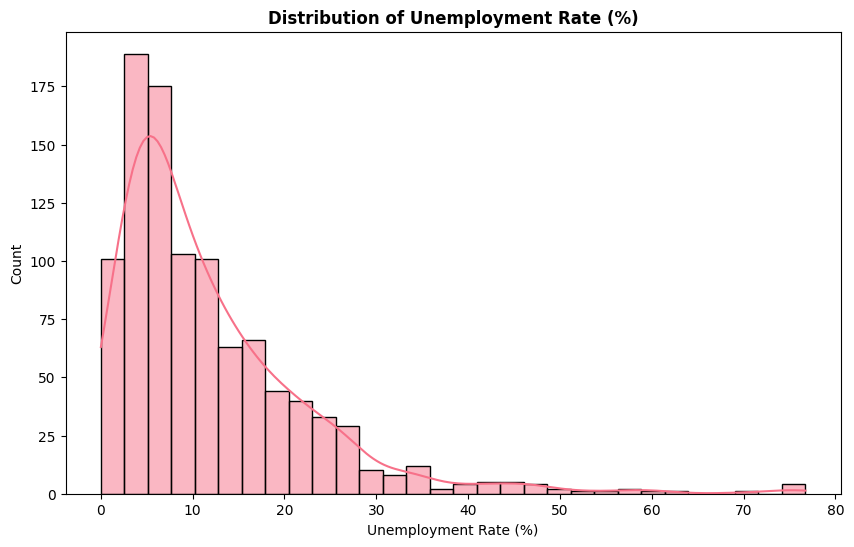

In [39]:
# Create figure with subplots for comprehensive analysis
fig = plt.figure(figsize=(10,6))

# 1. Distribution of Unemployment Rate
plt.plot(4, 2, 1)
sns.histplot(data=combined_df, x='Estimated Unemployment Rate (%)', bins=30, kde=True)
plt.title('Distribution of Unemployment Rate (%)', fontsize=12, fontweight='bold')
plt.xlabel('Unemployment Rate (%)')

([0, 1], [Text(0, 0, '2019'), Text(1, 0, '2020')])

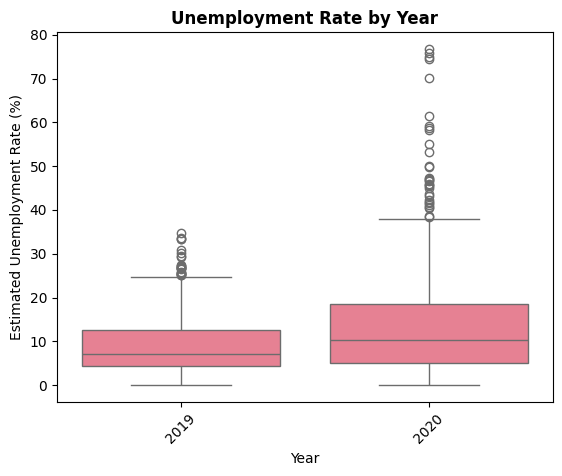

In [46]:
# 2. Unemployment Rate by Year
plt.plot(5, 3, 1)
sns.boxplot(data=combined_df, x='Year', y='Estimated Unemployment Rate (%)')
plt.title('Unemployment Rate by Year', fontsize=12, fontweight='bold')
plt.xticks(rotation=45)


Text(0.5, 1.0, 'Unemployment Rate: Urban vs Rural')

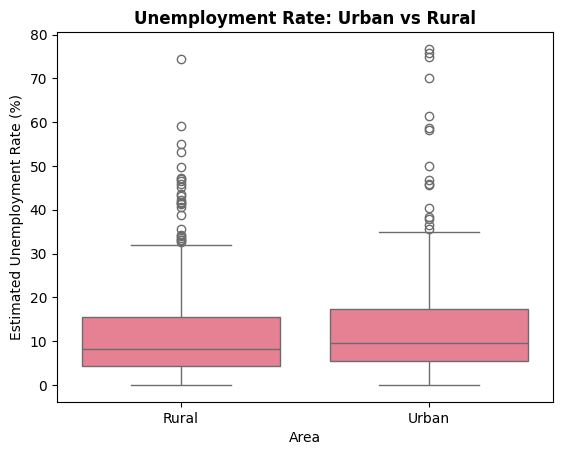

In [45]:
# 3. Unemployment Rate by Area (Urban vs Rural)
plt.plot(5, 3, 1)
sns.boxplot(data=combined_df, x='Area', y='Estimated Unemployment Rate (%)')
plt.title('Unemployment Rate: Urban vs Rural', fontsize=12, fontweight='bold')

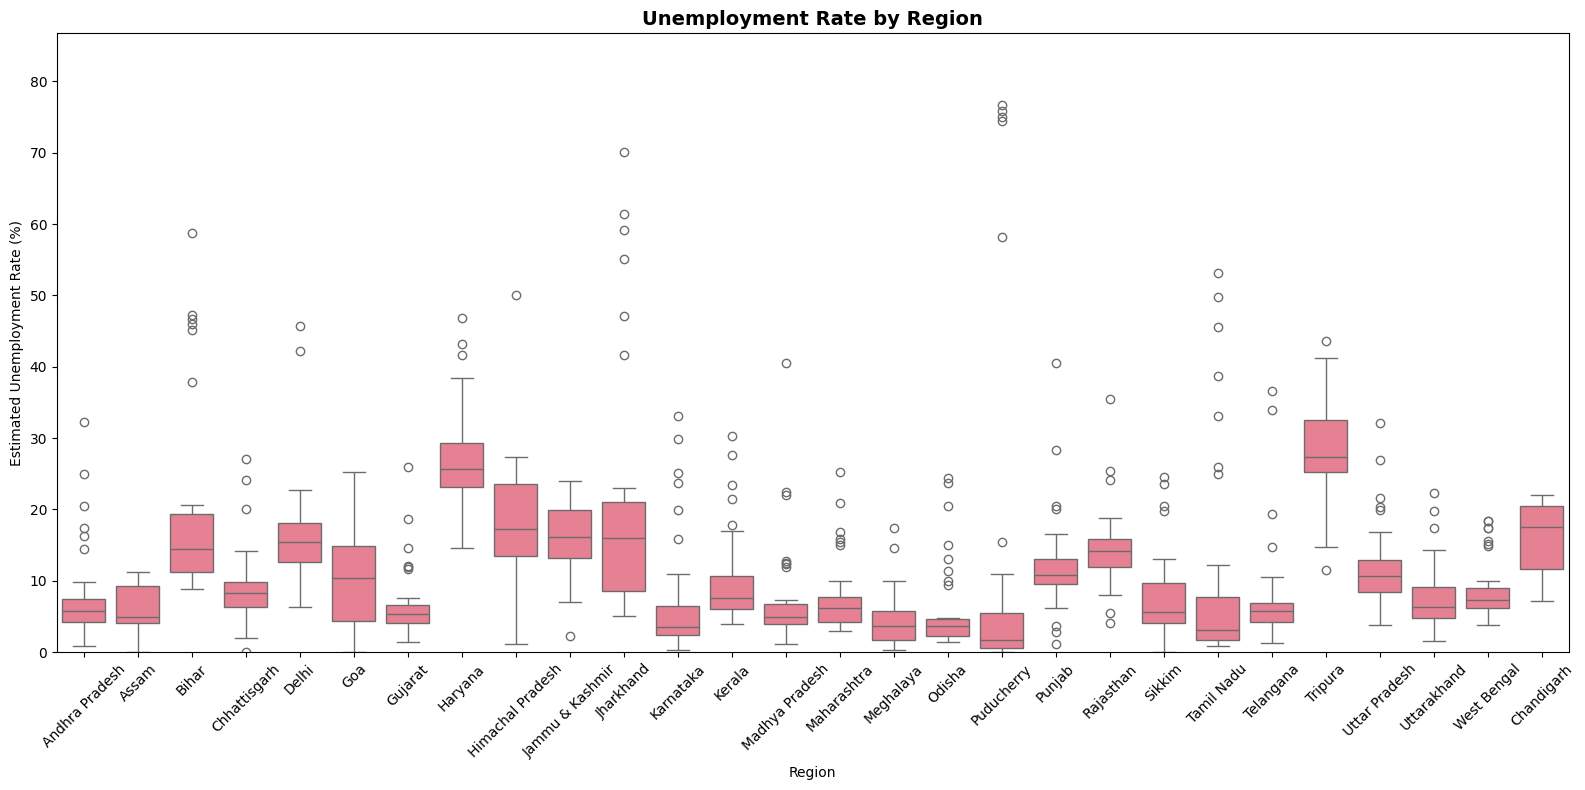

In [52]:
# 4. Unemployment Rate by Region
plt.figure(figsize=(16, 8))  # Increase figure size for better readability
sns.boxplot(data=combined_df, x='Region', y='Estimated Unemployment Rate (%)')
plt.title('Unemployment Rate by Region', fontsize=14, fontweight='bold')
plt.xlabel('Region')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.ylim(0, combined_df['Estimated Unemployment Rate (%)'].max() + 10)  # Extend y-axis length
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Labour Participation vs Unemployment Rate')

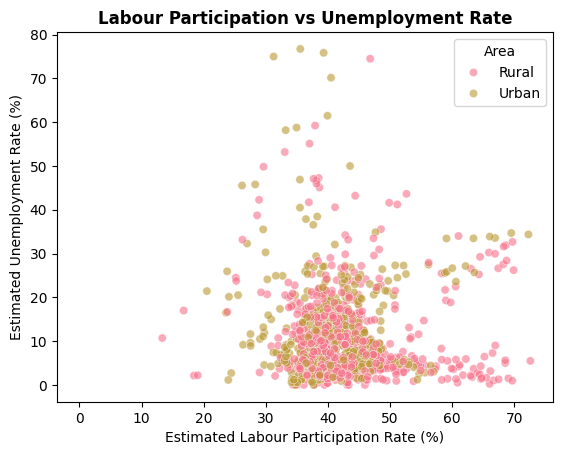

In [53]:
# 6. Labour Participation Rate vs Unemployment Rate
plt.plot(5, 3, 1)
sns.scatterplot(data=combined_df, x='Estimated Labour Participation Rate (%)', 
                y='Estimated Unemployment Rate (%)', hue='Area', alpha=0.6)
plt.title('Labour Participation vs Unemployment Rate', fontsize=12, fontweight='bold')

Text(0.5, 0, 'Average Unemployment Rate (%)')

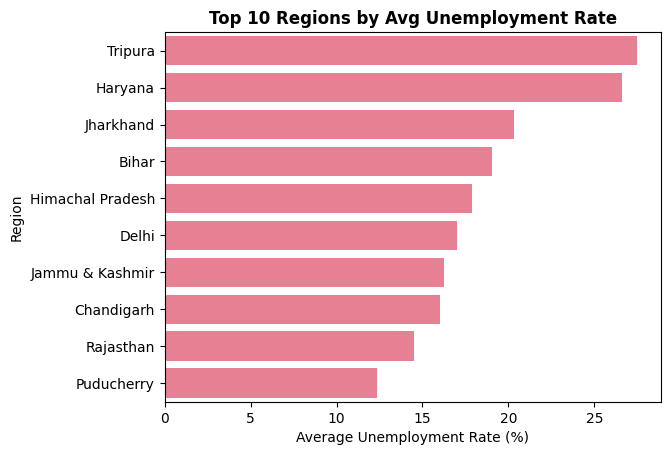

In [54]:
# 7. Top 10 States by Average Unemployment Rate
plt.plot(5, 3, 1)
state_avg = combined_df.groupby('Region')['Estimated Unemployment Rate (%)'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=state_avg.values, y=state_avg.index)
plt.title('Top 10 Regions by Avg Unemployment Rate', fontsize=12, fontweight='bold')
plt.xlabel('Average Unemployment Rate (%)')

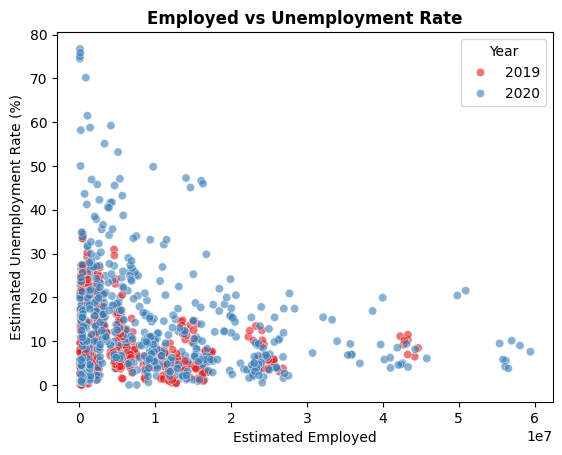

In [56]:
# 8. Employment vs Unemployment correlation
plt.plot(5, 3, 1)
sns.scatterplot(
    data=combined_df,
    x='Estimated Employed',
    y='Estimated Unemployment Rate (%)',
    hue='Year',
    alpha=0.6,
    palette='Set1'  # Change color palette
)
plt.title('Employed vs Unemployment Rate', fontsize=12, fontweight='bold')
plt.ticklabel_format(style='scientific', axis='x', scilimits=(0,0))

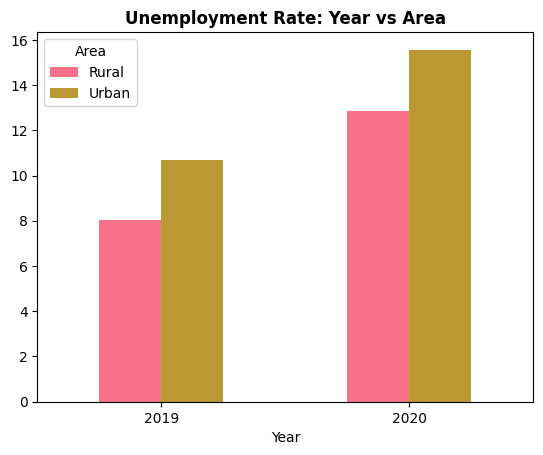

In [57]:
# 9. Year-wise comparison by Area
plt.plot(5, 3, 1)
year_area_avg = combined_df.groupby(['Year', 'Area'])['Estimated Unemployment Rate (%)'].mean().unstack()
year_area_avg.plot(kind='bar', ax=plt.gca())
plt.title('Unemployment Rate: Year vs Area', fontsize=12, fontweight='bold')
plt.xticks(rotation=0)
plt.legend(title='Area')

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5]),
 [Text(0, 0.5, 'Andhra Pradesh'),
  Text(0, 1.5, 'Assam'),
  Text(0, 2.5, 'Bihar'),
  Text(0, 3.5, 'Chandigarh'),
  Text(0, 4.5, 'Chhattisgarh'),
  Text(0, 5.5, 'Delhi'),
  Text(0, 6.5, 'Goa'),
  Text(0, 7.5, 'Gujarat'),
  Text(0, 8.5, 'Haryana'),
  Text(0, 9.5, 'Himachal Pradesh'),
  Text(0, 10.5, 'Jammu & Kashmir'),
  Text(0, 11.5, 'Jharkhand'),
  Text(0, 12.5, 'Karnataka'),
  Text(0, 13.5, 'Kerala'),
  Text(0, 14.5, 'Madhya Pradesh'),
  Text(0, 15.5, 'Maharashtra'),
  Text(0, 16.5, 'Meghalaya'),
  Text(0, 17.5, 'Odisha'),
  Text(0, 18.5, 'Puducherry'),
  Text(0, 19.5, 'Punjab'),
  Text(0, 20.5, 'Rajasthan'),
  Text(0, 21.5, 'Sikkim'),
  Text(0, 22.5, 'Tamil Nadu'),
  Text(0, 23.5, 'Telangana'),
  Text(0, 24.5, 'Tripura'),
  Text(0, 25.5, 'Uttar Pradesh'),
  Text(0, 26.5, 'Uttarakhand'),
  Tex

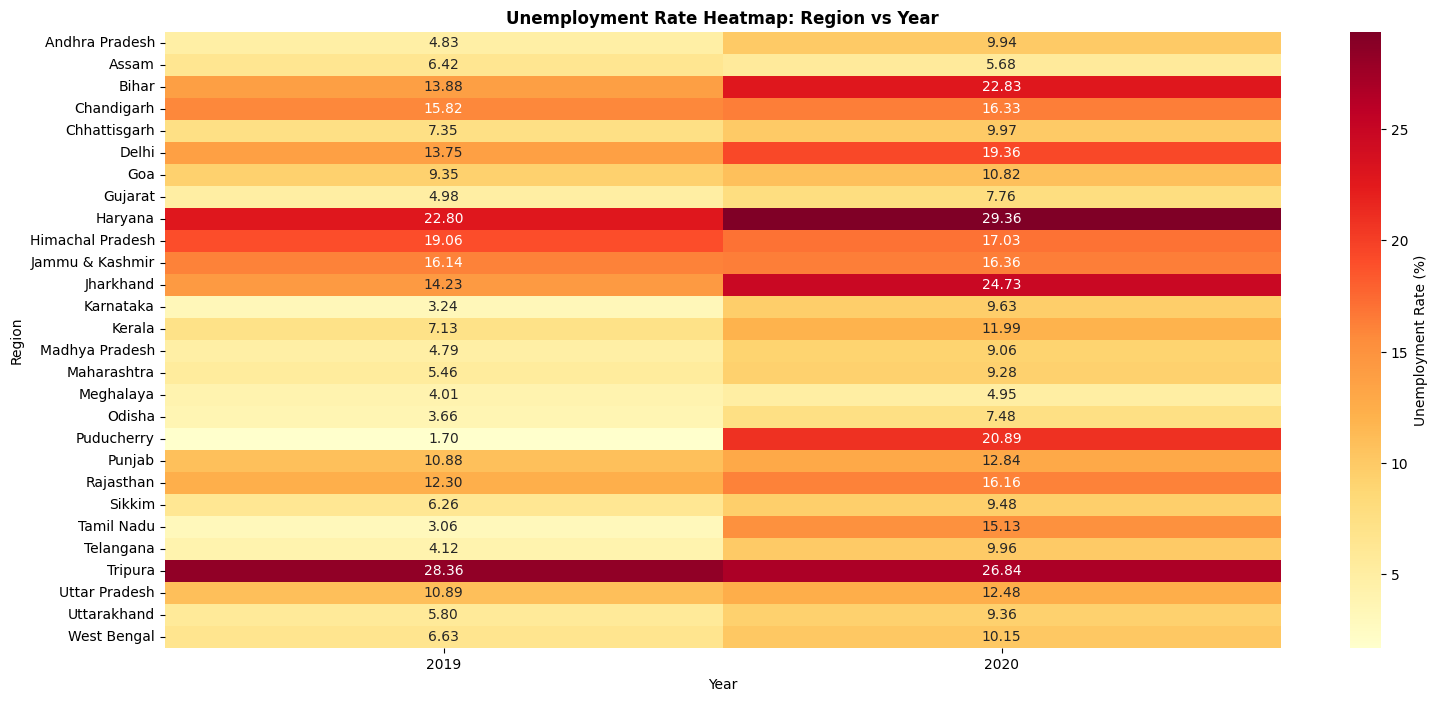

In [69]:
plt.plot(5, 3, 1)
region_year = combined_df.groupby(['Region', 'Year'])['Estimated Unemployment Rate (%)'].mean().unstack()
sns.heatmap(
    region_year,
    annot=True,
    fmt='.2f',
    cmap='YlOrRd',
    yticklabels=True,
    cbar_kws={'label': 'Unemployment Rate (%)'}
)
plt.title('Unemployment Rate Heatmap: Region vs Year', fontsize=12, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Region')
plt.gcf().set_size_inches(18, 8)
plt.yticks(rotation=0, fontsize=10)  # Make sure all region labels are visible

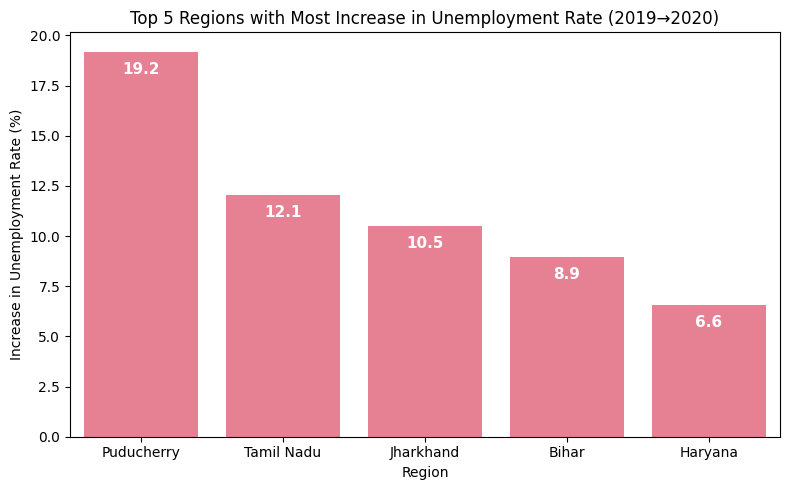

In [76]:
# Calculate the change in unemployment rate from 2019 to 2020 for each region
region_year_diff = region_year[2020] - region_year[2019]
top5_increase = region_year_diff.sort_values(ascending=False).head(5)

# Plot the top 5 regions with the most increase
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=top5_increase.index, y=top5_increase.values)
plt.xlabel("Region")
plt.ylabel("Increase in Unemployment Rate (%)")
plt.title("Top 5 Regions with Most Increase in Unemployment Rate (2019→2020)")
plt.tight_layout()

# Annotate the bars with the difference values, placing them within the bars
for i, value in enumerate(top5_increase.values):
    ax.text(i, value - 0.5, f"{value:.1f}", ha='center', va='top', fontsize=11, fontweight='bold', color='white')

plt.show()


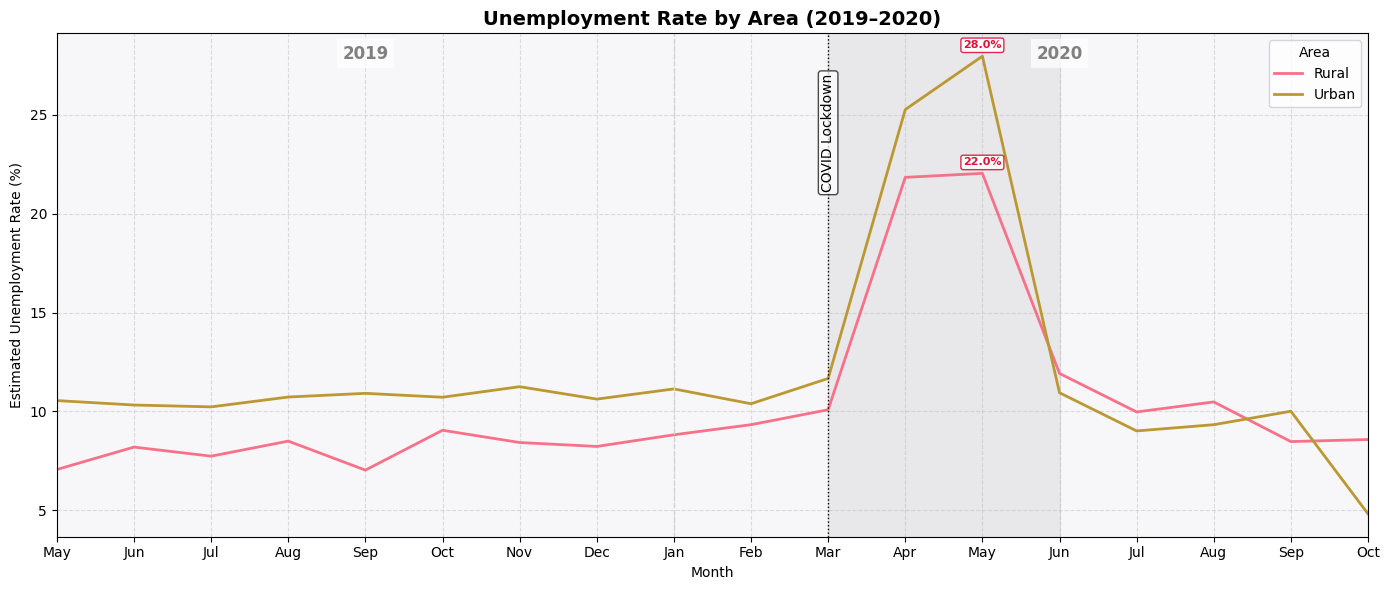

In [109]:
# Step 1: Group by month and area
monthly_data = (
    combined_df
    .groupby([combined_df['Date'].dt.to_period('M'), 'Area'])['Estimated Unemployment Rate (%)']
    .mean()
    .unstack()
)
monthly_data.index = monthly_data.index.to_timestamp()

# Step 2: Filter for 2019–2020 only
mask = (monthly_data.index.year >= 2019) & (monthly_data.index.year <= 2020)
filtered_data = monthly_data.loc[mask]

# Step 3: Plot setup
fig, ax = plt.subplots(figsize=(14, 6))
filtered_data.plot(ax=ax, linewidth=2)

# Step 4: X-axis formatting with ALL months
# Set x-axis ticks to every month
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))  # one tick per month
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

# Set x-axis tick labels manually to ensure all months are visible
ax.set_xticks(filtered_data.index)
ax.set_xticklabels([d.strftime('%b') for d in filtered_data.index], rotation=0)

# Step 5: Add vertical lines at Jan 1 of each year
for year in filtered_data.index.year.unique():
    jan = pd.Timestamp(f"{year}-01-01")
    ax.axvline(jan, color='lightgray', linestyle='--', linewidth=1)

# Step 6: Add year labels at midpoints
for year in filtered_data.index.year.unique():
    dates = filtered_data[filtered_data.index.year == year].index
    if len(dates) > 0:
        mid_date = dates[len(dates) // 2]
        ax.text(mid_date, ax.get_ylim()[1]*0.98, str(year), fontsize=12, fontweight='bold',
                ha='center', va='top', color='gray', bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))



# Step 7: Annotate peak unemployment per area with value and change from previous month
for area in filtered_data.columns:
    peak_idx = filtered_data[area].idxmax()
    peak_val = filtered_data[area].max()
    # Calculate change from previous month
    prev_idx = filtered_data.index.get_loc(peak_idx) - 1
    if prev_idx >= 0:
        prev_val = filtered_data[area].iloc[prev_idx]
        change = peak_val - prev_val
    # Make sure annotation stays inside the grid
    y_max = ax.get_ylim()[1]
    y_annotate = min(peak_val + 0.3, y_max - 0.5)
    ax.text(
        peak_idx, y_annotate,
        f"{peak_val:.1f}%",
        ha='center', va='bottom', fontsize=8, color='crimson', fontweight='bold',
        bbox=dict(facecolor='white', edgecolor='crimson', boxstyle='round,pad=0.2', alpha=0.9),
        clip_on=True
    )

# Step 8: COVID marker – March 2020
covid_start = pd.Timestamp('2020-03-01')
ax.axvline(covid_start, color='black', linestyle=':', linewidth=1, zorder=8)
ax.text(
    covid_start, ax.get_ylim()[1]*0.93, 'COVID Lockdown',
    rotation=90, verticalalignment='top', horizontalalignment='center',
    fontsize=10, color='black',
    bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.2', alpha=0.7),
    zorder=11
)

# Highlight COVID period (March–June 2020)
covid_end = pd.Timestamp('2020-06-30')
ax.axvspan(covid_start, covid_end, color='gray', alpha=0.12, zorder=0)

# Custom legend and grid
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title='Area', fontsize=11, title_fontsize=12, loc='upper left', frameon=True, facecolor='white', edgecolor='gray')
ax.grid(True, linestyle='--', alpha=0.3, zorder=0)

# Add subtle background color
ax.set_facecolor('#f7f7fa')


# Step 9: Final polish
plt.title('Unemployment Rate by Area (2019–2020)', fontsize=14, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.legend(title='Area')
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

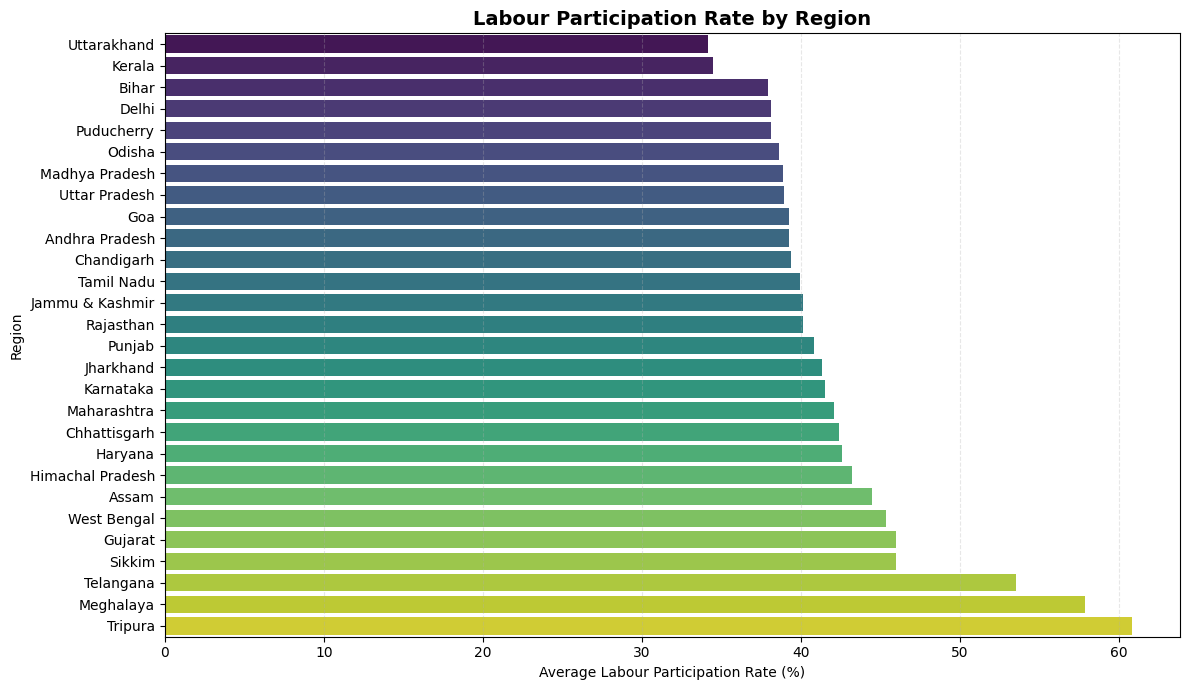

In [120]:
# 12. Labour Participation by Region
# Step 1: Grouping and sorting
region_labour = (
    combined_df.groupby('Region')['Estimated Labour Participation Rate (%)']
    .mean()
    .sort_values()
)

# Step 2: Plot with taller Y-axis
plt.figure(figsize=(12, 7))  # ⬅️ increase height from 6 to 8 or more
sns.barplot(x=region_labour.values, y=region_labour.index, palette="viridis")

# Step 3: Styling
plt.title('Labour Participation Rate by Region', fontsize=14, fontweight='bold')
plt.xlabel('Average Labour Participation Rate (%)')
plt.ylabel('Region')
plt.grid(True, axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Correlation Matrix')

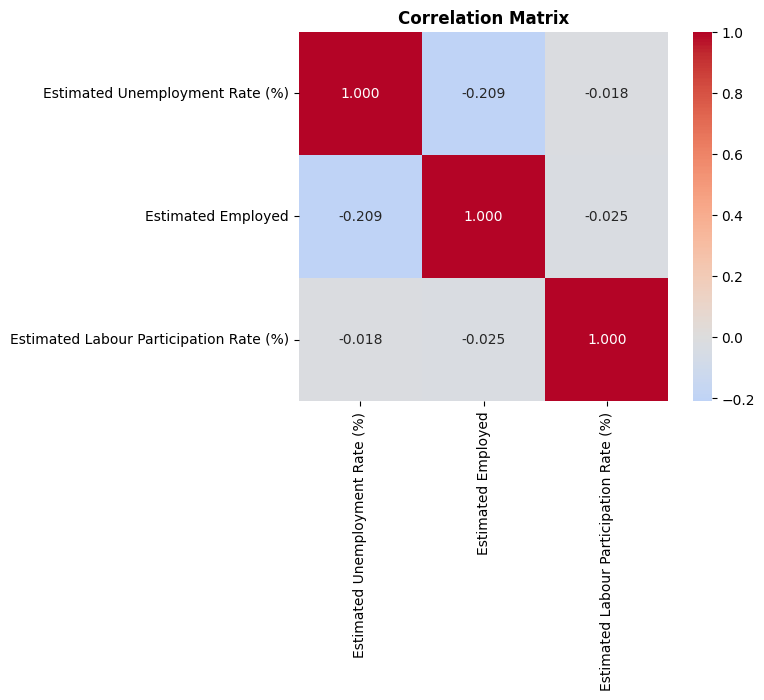

In [122]:
# 13. Correlation between numeric variables
plt.plot(5, 3, 1)
numeric_cols = ['Estimated Unemployment Rate (%)', 'Estimated Employed', 
                'Estimated Labour Participation Rate (%)']
correlation_matrix = combined_df[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.3f')
plt.title('Correlation Matrix', fontsize=12, fontweight='bold')

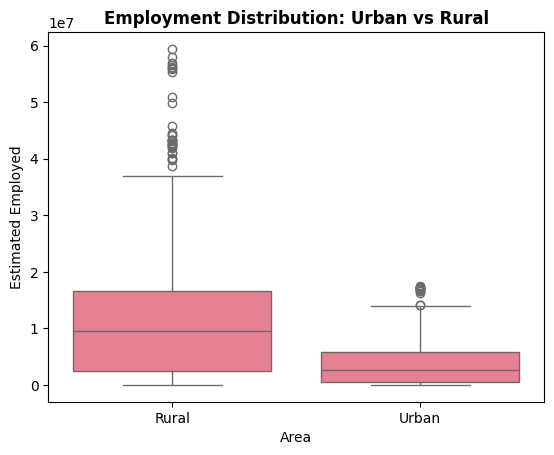

In [123]:
# 14. Distribution of Employment by Area
plt.plot(5, 3, 1)
sns.boxplot(data=combined_df, x='Area', y='Estimated Employed')
plt.title('Employment Distribution: Urban vs Rural', fontsize=12, fontweight='bold')
plt.ticklabel_format(style='scientific', axis='y', scilimits=(0,0))

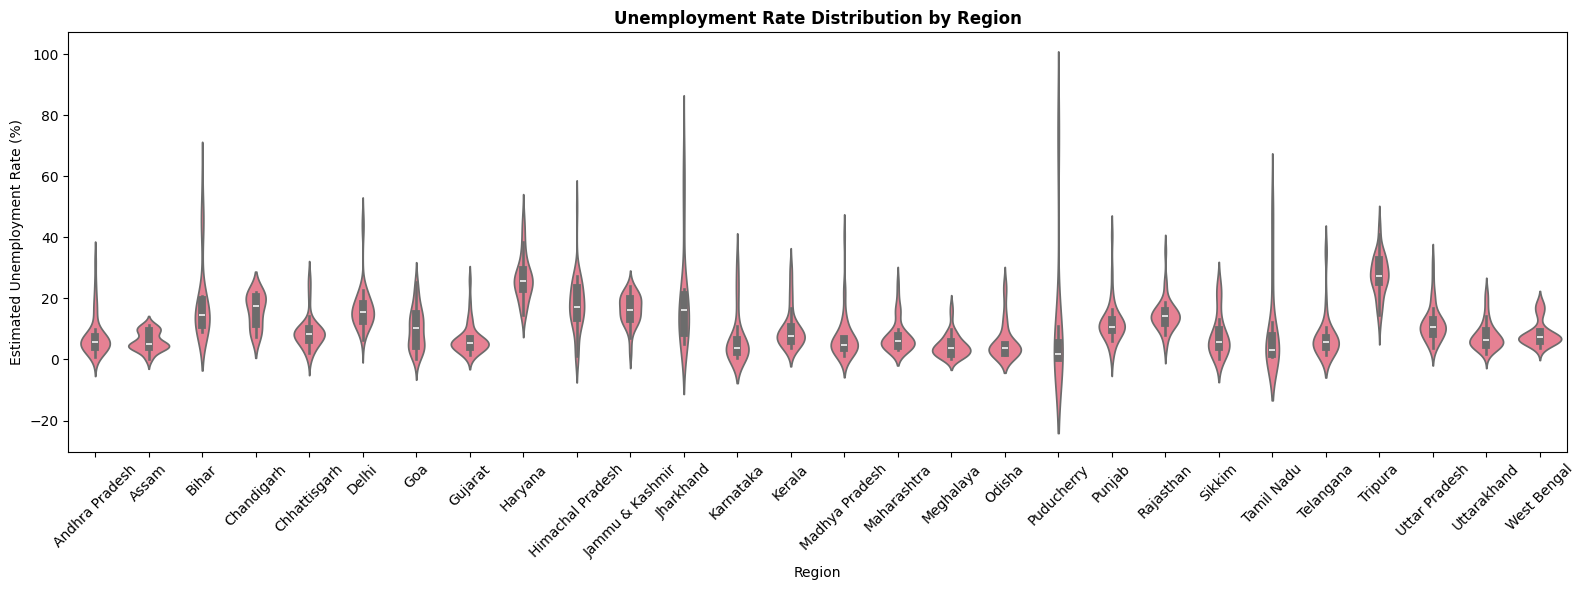

In [126]:
# 15. Regional unemployment variation
plt.figure(figsize=(16, 6))  # ⬅️ Increase width (16) for more x-axis space
sns.violinplot(data=combined_df, x='Region', y='Estimated Unemployment Rate (%)')

plt.title('Unemployment Rate Distribution by Region', fontsize=12, fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [127]:
# Detailed Statistical Analysis
print("\n=== DETAILED ANALYSIS ===")

print("\n1. UNEMPLOYMENT RATE BY YEAR:")
year_stats = combined_df.groupby('Year')['Estimated Unemployment Rate (%)'].agg(['mean', 'std', 'min', 'max'])
print(year_stats)

print("\n2. UNEMPLOYMENT RATE BY AREA:")
area_stats = combined_df.groupby('Area')['Estimated Unemployment Rate (%)'].agg(['mean', 'std', 'min', 'max'])
print(area_stats)

print("\n3. UNEMPLOYMENT RATE BY REGION:")
region_stats = combined_df.groupby('Region')['Estimated Unemployment Rate (%)'].agg(['mean', 'std', 'min', 'max']).sort_values('mean', ascending=False)
print(region_stats.head(10))

print("\n4. CORRELATION ANALYSIS:")
correlations = combined_df[numeric_cols].corr()['Estimated Unemployment Rate (%)'].sort_values(ascending=False)
print(correlations)

print("\n5. TOP 5 HIGHEST UNEMPLOYMENT PERIODS:")
top_5_unemployment = combined_df.nlargest(5, 'Estimated Unemployment Rate (%)')[['Region', 'Date', 'Area', 'Estimated Unemployment Rate (%)']]
print(top_5_unemployment)

print("\n6. BOTTOM 5 LOWEST UNEMPLOYMENT PERIODS:")
bottom_5_unemployment = combined_df.nsmallest(5, 'Estimated Unemployment Rate (%)')[['Region', 'Date', 'Area', 'Estimated Unemployment Rate (%)']]
print(bottom_5_unemployment)

# Additional insights
print("\n=== KEY INSIGHTS ===")

# Year comparison
year_2019_avg = combined_df[combined_df['Year'] == 2019]['Estimated Unemployment Rate (%)'].mean()
year_2020_avg = combined_df[combined_df['Year'] == 2020]['Estimated Unemployment Rate (%)'].mean()
print(f"Average Unemployment Rate 2019: {year_2019_avg:.2f}%")
print(f"Average Unemployment Rate 2020: {year_2020_avg:.2f}%")
print(f"Year-over-Year Change: {year_2020_avg - year_2019_avg:.2f}%")

# Urban vs Rural comparison
urban_avg = combined_df[combined_df['Area'] == 'Urban']['Estimated Unemployment Rate (%)'].mean()
rural_avg = combined_df[combined_df['Area'] == 'Rural']['Estimated Unemployment Rate (%)'].mean()
print(f"\nAverage Urban Unemployment Rate: {urban_avg:.2f}%")
print(f"Average Rural Unemployment Rate: {rural_avg:.2f}%")

# Regional insights
highest_region = region_stats.index[0]
lowest_region = region_stats.index[-1]
print(f"\nHighest Unemployment Region: {highest_region} ({region_stats.loc[highest_region, 'mean']:.2f}%)")
print(f"Lowest Unemployment Region: {lowest_region} ({region_stats.loc[lowest_region, 'mean']:.2f}%)")



=== DETAILED ANALYSIS ===

1. UNEMPLOYMENT RATE BY YEAR:
      mean  std  min  max
Year                     
2019     9    7    0   35
2020    14   12    0   77

2. UNEMPLOYMENT RATE BY AREA:
       mean  std  min  max
Area                      
Rural    11   10    0   75
Urban    13   12    0   77

3. UNEMPLOYMENT RATE BY REGION:
                  mean  std  min  max
Region                               
Tripura             27    7   12   44
Haryana             27    7   15   47
Jharkhand           20   17    5   70
Bihar               19   13    9   59
Himachal Pradesh    18    9    1   50
Delhi               17    7    6   46
Jammu & Kashmir     16    5    2   24
Chandigarh          16    6    7   22
Rajasthan           15    5    4   36
Puducherry          12   25    0   77

4. CORRELATION ANALYSIS:
Estimated Unemployment Rate (%)            1
Estimated Labour Participation Rate (%)   -0
Estimated Employed                        -0
Name: Estimated Unemployment Rate (%), dtype: flo

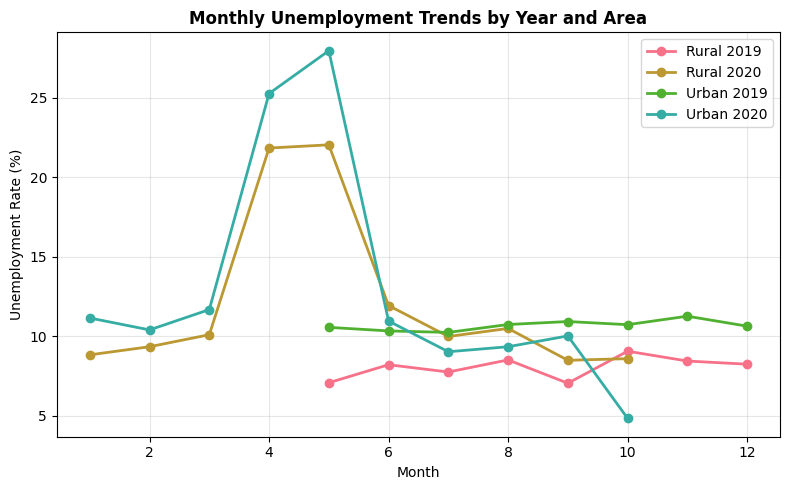

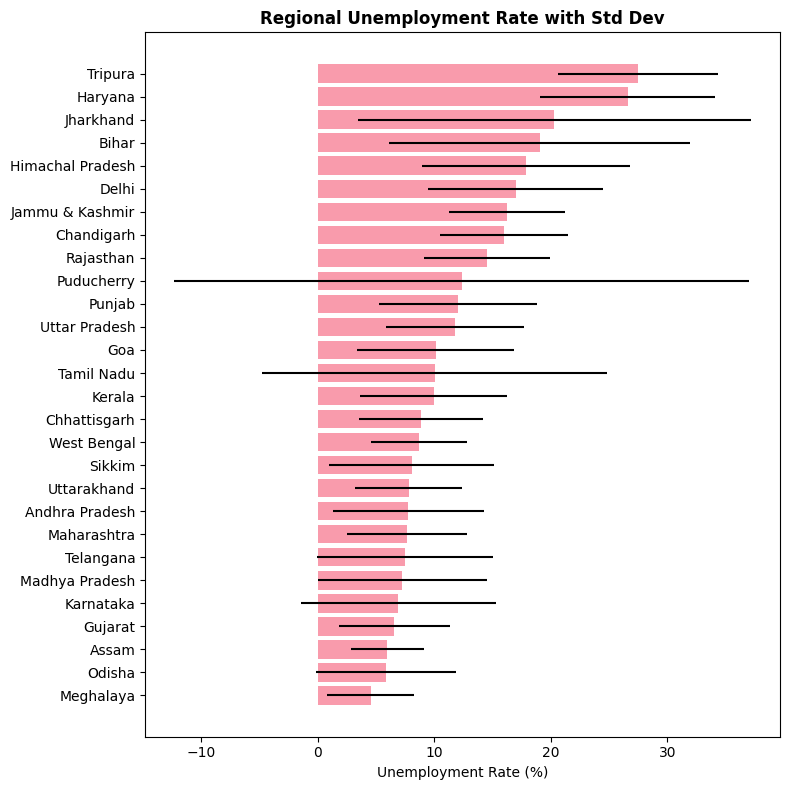

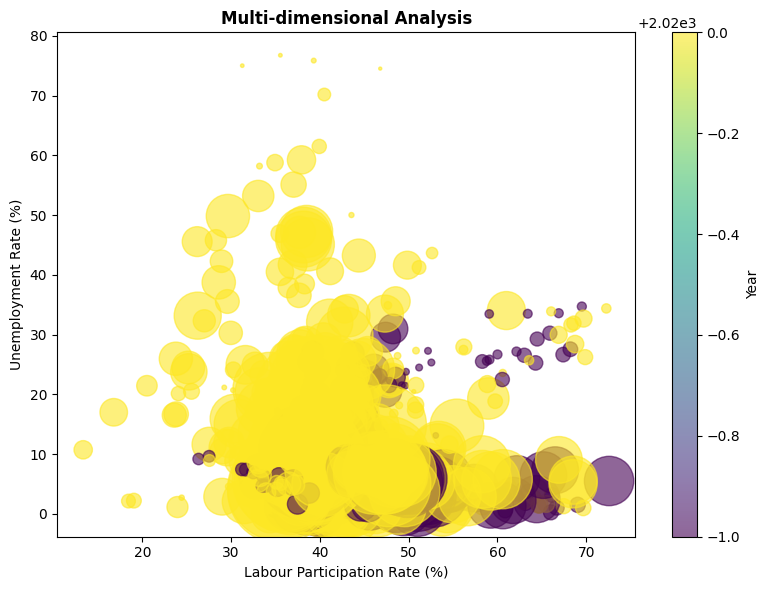

In [130]:
# 1. Monthly trend by year and area
fig1, ax1 = plt.subplots(figsize=(8, 5))
for area in combined_df['Area'].unique():
    for year in combined_df['Year'].unique():
        subset = combined_df[(combined_df['Area'] == area) & (combined_df['Year'] == year)]
        monthly_trend = subset.groupby('Month')['Estimated Unemployment Rate (%)'].mean()
        ax1.plot(monthly_trend.index, monthly_trend.values, marker='o', label=f'{area} {year}', linewidth=2)
ax1.set_title('Monthly Unemployment Trends by Year and Area', fontweight='bold')
ax1.set_xlabel('Month')
ax1.set_ylabel('Unemployment Rate (%)')
ax1.legend()
ax1.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 2. Regional comparison with error bars
fig2, ax2 = plt.subplots(figsize=(8, 8))
region_mean = combined_df.groupby('Region')['Estimated Unemployment Rate (%)'].mean().sort_values(ascending=True)
region_std = combined_df.groupby('Region')['Estimated Unemployment Rate (%)'].std().reindex(region_mean.index)
ax2.barh(range(len(region_mean)), region_mean.values, xerr=region_std.values, alpha=0.7)
ax2.set_yticks(range(len(region_mean)))
ax2.set_yticklabels(region_mean.index)
ax2.set_xlabel('Unemployment Rate (%)')
ax2.set_title('Regional Unemployment Rate with Std Dev', fontweight='bold')
plt.tight_layout()
plt.show()

# 3. Scatter plot with multiple dimensions
fig3, ax3 = plt.subplots(figsize=(8, 6))
scatter = ax3.scatter(
    combined_df['Estimated Labour Participation Rate (%)'],
    combined_df['Estimated Unemployment Rate (%)'],
    c=combined_df['Year'],
    s=combined_df['Estimated Employed'] / 10000,
    alpha=0.6,
    cmap='viridis'
)
ax3.set_xlabel('Labour Participation Rate (%)')
ax3.set_ylabel('Unemployment Rate (%)')
ax3.set_title('Multi-dimensional Analysis', fontweight='bold')
plt.colorbar(scatter, ax=ax3, label='Year')
plt.tight_layout()
plt.show()

In [131]:
# Set enhanced styling for professional analysis
plt.style.use('default')
sns.set_palette("Set2")
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'
combined_df['Year_Month'] = combined_df['Date'].dt.to_period('M')

In [133]:
# Define COVID periods
# Pre-COVID: Jan 2019 - Feb 2020
# COVID Impact: Mar 2020 - Dec 2020 (considering India's lockdown started March 25, 2020)
combined_df['COVID_Period'] = combined_df['Date'].apply(lambda x: 
    'Pre-COVID' if x < pd.Timestamp('2020-03-01') else 'COVID Period')

print("="*60)
print("           COVID-19 IMPACT ANALYSIS ON EMPLOYMENT")
print("="*60)

# Basic COVID impact statistics
pre_covid = combined_df[combined_df['COVID_Period'] == 'Pre-COVID']
covid_period = combined_df[combined_df['COVID_Period'] == 'COVID Period']

print("\n BASIC IMPACT STATISTICS:")
print("-" * 40)
print(f"Pre-COVID Average Unemployment Rate: {pre_covid['Estimated Unemployment Rate (%)'].mean():.2f}%")
print(f"COVID Period Average Unemployment Rate: {covid_period['Estimated Unemployment Rate (%)'].mean():.2f}%")
print(f"Absolute Increase: {covid_period['Estimated Unemployment Rate (%)'].mean() - pre_covid['Estimated Unemployment Rate (%)'].mean():.2f} percentage points")
print(f"Relative Increase: {((covid_period['Estimated Unemployment Rate (%)'].mean() / pre_covid['Estimated Unemployment Rate (%)'].mean()) - 1) * 100:.1f}%")

print(f"\nPre-COVID Average Employment: {pre_covid['Estimated Employed'].mean():,.0f}")
print(f"COVID Period Average Employment: {covid_period['Estimated Employed'].mean():,.0f}")
print(f"Employment Loss: {pre_covid['Estimated Employed'].mean() - covid_period['Estimated Employed'].mean():,.0f}")


           COVID-19 IMPACT ANALYSIS ON EMPLOYMENT

 BASIC IMPACT STATISTICS:
----------------------------------------
Pre-COVID Average Unemployment Rate: 9.48%
COVID Period Average Unemployment Rate: 15.31%
Absolute Increase: 5.82 percentage points
Relative Increase: 61.4%

Pre-COVID Average Employment: 8,182,063
COVID Period Average Employment: 10,138,734
Employment Loss: -1,956,671


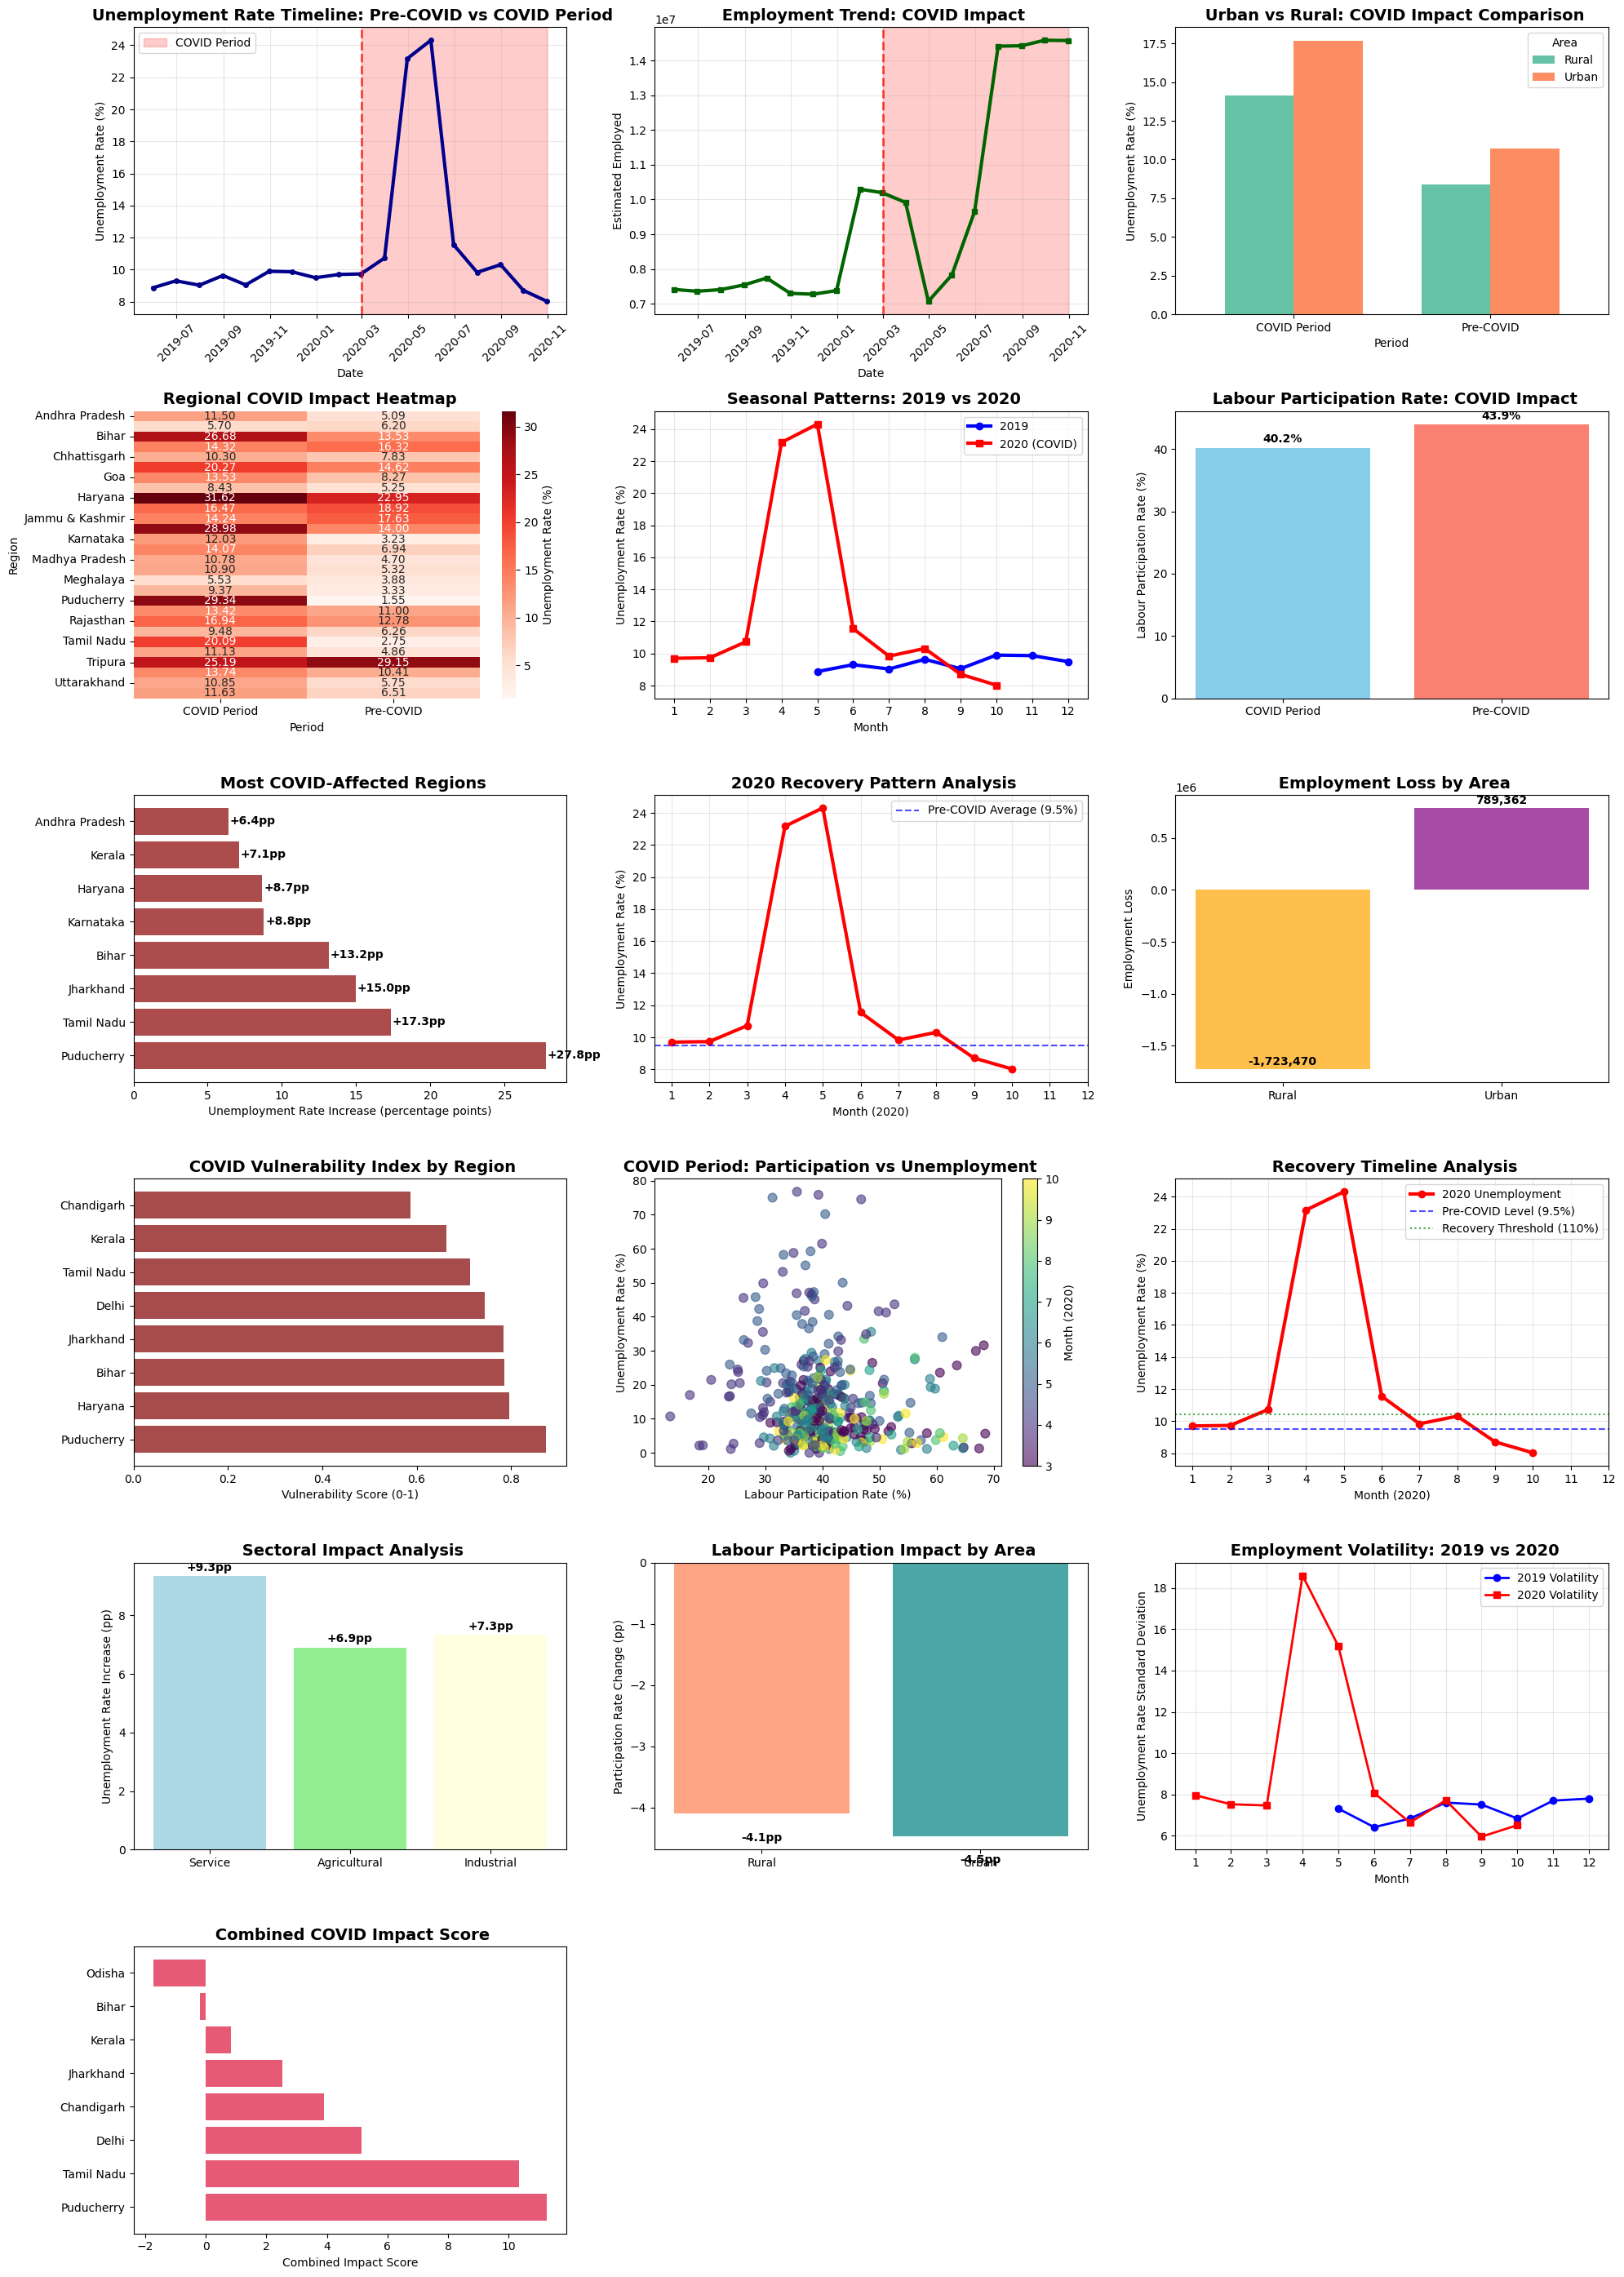

In [ ]:
fig = plt.figure(figsize=(20, 28))

# 1. Overall unemployment trend with COVID period highlighted
plt.subplot(6, 3, 1)
monthly_trend = combined_df.groupby('Date')['Estimated Unemployment Rate (%)'].mean()
plt.plot(monthly_trend.index, monthly_trend.values, linewidth=3, color='darkblue', marker='o', markersize=4)
plt.axvline(x=pd.to_datetime('2020-03-01'), color='red', linestyle='--', linewidth=2, alpha=0.7)
plt.axvspan(pd.to_datetime('2020-03-01'), combined_df['Date'].max(), alpha=0.2, color='red', label='COVID Period')
plt.title(' Unemployment Rate Timeline: Pre-COVID vs COVID Period', fontsize=14, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# 2. Employment trend with COVID impact
plt.subplot(6, 3, 2)
employment_trend = combined_df.groupby('Date')['Estimated Employed'].mean()
plt.plot(employment_trend.index, employment_trend.values, linewidth=3, color='darkgreen', marker='s', markersize=4)
plt.axvline(x=pd.to_datetime('2020-03-01'), color='red', linestyle='--', linewidth=2, alpha=0.7)
plt.axvspan(pd.to_datetime('2020-03-01'), combined_df['Date'].max(), alpha=0.2, color='red')
plt.title(' Employment Trend: COVID Impact', fontsize=14, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Estimated Employed')
plt.ticklabel_format(style='scientific', axis='y', scilimits=(0,0))
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# 3. Urban vs Rural COVID impact comparison
plt.subplot(6, 3, 3)
area_covid_impact = combined_df.groupby(['COVID_Period', 'Area'])['Estimated Unemployment Rate (%)'].mean().unstack()
area_covid_impact.plot(kind='bar', ax=plt.gca(), width=0.7)
plt.title(' Urban vs Rural: COVID Impact Comparison', fontsize=14, fontweight='bold')
plt.xlabel('Period')
plt.ylabel('Unemployment Rate (%)')
plt.xticks(rotation=0)
plt.legend(title='Area')

# 4. Regional COVID impact heatmap
plt.subplot(6, 3, 4)
regional_impact = combined_df.groupby(['Region', 'COVID_Period'])['Estimated Unemployment Rate (%)'].mean().unstack()
sns.heatmap(regional_impact, annot=True, fmt='.2f', cmap='Reds', cbar_kws={'label': 'Unemployment Rate (%)'})
plt.title(' Regional COVID Impact Heatmap', fontsize=14, fontweight='bold')
plt.xlabel('Period')
plt.ylabel('Region')

# 5. Monthly seasonal patterns in COVID year
plt.subplot(6, 3, 5)
monthly_2020 = combined_df[combined_df['Year'] == 2020].groupby('Month')['Estimated Unemployment Rate (%)'].mean()
monthly_2019 = combined_df[combined_df['Year'] == 2019].groupby('Month')['Estimated Unemployment Rate (%)'].mean()
plt.plot(monthly_2019.index, monthly_2019.values, marker='o', linewidth=3, label='2019', color='blue')
plt.plot(monthly_2020.index, monthly_2020.values, marker='s', linewidth=3, label='2020 (COVID)', color='red')
plt.title(' Seasonal Patterns: 2019 vs 2020', fontsize=14, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Unemployment Rate (%)')
plt.legend()
plt.xticks(range(1, 13))
plt.grid(True, alpha=0.3)

# 6. Labour participation impact
plt.subplot(6, 3, 6)
labour_participation = combined_df.groupby('COVID_Period')['Estimated Labour Participation Rate (%)'].mean()
bars = plt.bar(labour_participation.index, labour_participation.values, color=['skyblue', 'salmon'])
plt.title(' Labour Participation Rate: COVID Impact', fontsize=14, fontweight='bold')
plt.ylabel('Labour Participation Rate (%)')
for bar, value in zip(bars, labour_participation.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, f'{value:.1f}%', 
             ha='center', va='bottom', fontweight='bold')

# 7. Worst affected regions
plt.subplot(6, 3, 7)
regional_change = (regional_impact['COVID Period'] - regional_impact['Pre-COVID']).sort_values(ascending=False)
top_affected = regional_change.head(8)
bars = plt.barh(range(len(top_affected)), top_affected.values, color='darkred', alpha=0.7)
plt.yticks(range(len(top_affected)), top_affected.index)
plt.title(' Most COVID-Affected Regions', fontsize=14, fontweight='bold')
plt.xlabel('Unemployment Rate Increase (percentage points)')
for i, (region, value) in enumerate(top_affected.items()):
    plt.text(value + 0.1, i, f'+{value:.1f}pp', va='center', fontweight='bold')

# 8. Recovery patterns (if any)
plt.subplot(6, 3, 8)
covid_months = combined_df[combined_df['Year'] == 2020].groupby('Month')['Estimated Unemployment Rate (%)'].mean()
plt.plot(covid_months.index, covid_months.values, marker='o', linewidth=3, color='red')
plt.axhline(y=pre_covid['Estimated Unemployment Rate (%)'].mean(), color='blue', linestyle='--', 
            label=f'Pre-COVID Average ({pre_covid["Estimated Unemployment Rate (%)"].mean():.1f}%)', alpha=0.7)
plt.title(' 2020 Recovery Pattern Analysis', fontsize=14, fontweight='bold')
plt.xlabel('Month (2020)')
plt.ylabel('Unemployment Rate (%)')
plt.legend()
plt.xticks(range(1, 13))
plt.grid(True, alpha=0.3)

# 9. Employment loss by area
plt.subplot(6, 3, 9)
employment_by_area = combined_df.groupby(['COVID_Period', 'Area'])['Estimated Employed'].mean().unstack()
employment_loss = employment_by_area.loc['Pre-COVID'] - employment_by_area.loc['COVID Period']
bars = plt.bar(employment_loss.index, employment_loss.values, color=['orange', 'purple'], alpha=0.7)
plt.title(' Employment Loss by Area', fontsize=14, fontweight='bold')
plt.ylabel('Employment Loss')
plt.ticklabel_format(style='scientific', axis='y', scilimits=(0,0))
for bar, value in zip(bars, employment_loss.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(employment_loss.values)*0.02, 
             f'{value:,.0f}', ha='center', va='bottom', fontweight='bold')

# 10. Vulnerability index (combination of factors)
plt.subplot(6, 3, 10)
# Create vulnerability index: high unemployment + low participation + high employment loss
vulnerability_data = combined_df[combined_df['COVID_Period'] == 'COVID Period'].groupby('Region').agg({
    'Estimated Unemployment Rate (%)': 'mean',
    'Estimated Labour Participation Rate (%)': 'mean',
    'Estimated Employed': 'mean'
}).reset_index()

# Normalize and create vulnerability score
vulnerability_data['Unemployment_norm'] = (vulnerability_data['Estimated Unemployment Rate (%)'] - 
                                         vulnerability_data['Estimated Unemployment Rate (%)'].min()) / \
                                        (vulnerability_data['Estimated Unemployment Rate (%)'].max() - 
                                         vulnerability_data['Estimated Unemployment Rate (%)'].min())

vulnerability_data['Participation_norm'] = 1 - ((vulnerability_data['Estimated Labour Participation Rate (%)'] - 
                                               vulnerability_data['Estimated Labour Participation Rate (%)'].min()) / \
                                              (vulnerability_data['Estimated Labour Participation Rate (%)'].max() - 
                                               vulnerability_data['Estimated Labour Participation Rate (%)'].min()))

vulnerability_data['Vulnerability_Score'] = (vulnerability_data['Unemployment_norm'] + 
                                           vulnerability_data['Participation_norm']) / 2

top_vulnerable = vulnerability_data.nlargest(8, 'Vulnerability_Score')
bars = plt.barh(range(len(top_vulnerable)), top_vulnerable['Vulnerability_Score'], color='maroon', alpha=0.7)
plt.yticks(range(len(top_vulnerable)), top_vulnerable['Region'])
plt.title(' COVID Vulnerability Index by Region', fontsize=14, fontweight='bold')
plt.xlabel('Vulnerability Score (0-1)')

# 11. Scatter plot: Unemployment vs Labour Participation (COVID period)
plt.subplot(6, 3, 11)
covid_data = combined_df[combined_df['COVID_Period'] == 'COVID Period']
scatter = plt.scatter(covid_data['Estimated Labour Participation Rate (%)'], 
                     covid_data['Estimated Unemployment Rate (%)'],
                     c=covid_data['Month'], cmap='viridis', alpha=0.6, s=60)
plt.colorbar(scatter, label='Month (2020)')
plt.title(' COVID Period: Participation vs Unemployment', fontsize=14, fontweight='bold')
plt.xlabel('Labour Participation Rate (%)')
plt.ylabel('Unemployment Rate (%)')

# 12. Time to recovery analysis
plt.subplot(6, 3, 12)
# Calculate months to reach pre-COVID levels
pre_covid_avg = pre_covid['Estimated Unemployment Rate (%)'].mean()
covid_monthly = combined_df[combined_df['Year'] == 2020].groupby('Month')['Estimated Unemployment Rate (%)'].mean()
recovery_months = covid_monthly[covid_monthly <= pre_covid_avg * 1.1].index  # Within 10% of pre-COVID levels

plt.plot(covid_monthly.index, covid_monthly.values, marker='o', linewidth=3, color='red', label='2020 Unemployment')
plt.axhline(y=pre_covid_avg, color='blue', linestyle='--', label=f'Pre-COVID Level ({pre_covid_avg:.1f}%)', alpha=0.7)
plt.axhline(y=pre_covid_avg * 1.1, color='green', linestyle=':', label='Recovery Threshold (110%)', alpha=0.7)
plt.title(' Recovery Timeline Analysis', fontsize=14, fontweight='bold')
plt.xlabel('Month (2020)')
plt.ylabel('Unemployment Rate (%)')
plt.legend()
plt.xticks(range(1, 13))
plt.grid(True, alpha=0.3)

# 13. Economic sector vulnerability (if we can infer from regions)
plt.subplot(6, 3, 13)
# Categorize regions by likely economic base
service_regions = ['Delhi', 'Karnataka', 'Maharashtra', 'Tamil Nadu']
agricultural_regions = ['Punjab', 'Haryana', 'Uttar Pradesh', 'Bihar']
industrial_regions = ['Gujarat', 'West Bengal', 'Jharkhand', 'Odisha']

sector_impact = {}
for sector, regions in [('Service', service_regions), ('Agricultural', agricultural_regions), ('Industrial', industrial_regions)]:
    sector_data = combined_df[combined_df['Region'].isin(regions)]
    if not sector_data.empty:
        pre_covid_sector = sector_data[sector_data['COVID_Period'] == 'Pre-COVID']['Estimated Unemployment Rate (%)'].mean()
        covid_sector = sector_data[sector_data['COVID_Period'] == 'COVID Period']['Estimated Unemployment Rate (%)'].mean()
        sector_impact[sector] = covid_sector - pre_covid_sector

if sector_impact:
    bars = plt.bar(sector_impact.keys(), sector_impact.values(), color=['lightblue', 'lightgreen', 'lightyellow'])
    plt.title(' Sectoral Impact Analysis', fontsize=14, fontweight='bold')
    plt.ylabel('Unemployment Rate Increase (pp)')
    for bar, value in zip(bars, sector_impact.values()):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1, f'+{value:.1f}pp', 
                 ha='center', va='bottom', fontweight='bold')

# 14. Gender impact proxy (using participation rates)
plt.subplot(6, 3, 14)
participation_impact = combined_df.groupby(['COVID_Period', 'Area'])['Estimated Labour Participation Rate (%)'].mean().unstack()
participation_change = participation_impact.loc['COVID Period'] - participation_impact.loc['Pre-COVID']
bars = plt.bar(participation_change.index, participation_change.values, color=['coral', 'teal'], alpha=0.7)
plt.title(' Labour Participation Impact by Area', fontsize=14, fontweight='bold')
plt.ylabel('Participation Rate Change (pp)')
for bar, value in zip(bars, participation_change.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + (0.1 if value > 0 else -0.3), 
             f'{value:+.1f}pp', ha='center', va='bottom' if value > 0 else 'top', fontweight='bold')

# 15. Monthly volatility analysis
plt.subplot(6, 3, 15)
volatility_2019 = combined_df[combined_df['Year'] == 2019].groupby('Month')['Estimated Unemployment Rate (%)'].std()
volatility_2020 = combined_df[combined_df['Year'] == 2020].groupby('Month')['Estimated Unemployment Rate (%)'].std()
plt.plot(volatility_2019.index, volatility_2019.values, marker='o', linewidth=2, label='2019 Volatility', color='blue')
plt.plot(volatility_2020.index, volatility_2020.values, marker='s', linewidth=2, label='2020 Volatility', color='red')
plt.title(' Employment Volatility: 2019 vs 2020', fontsize=14, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Unemployment Rate Standard Deviation')
plt.legend()
plt.xticks(range(1, 13))
plt.grid(True, alpha=0.3)

# 16. Combined impact score
plt.subplot(6, 3, 16)
regional_combined_impact = combined_df.groupby(['Region', 'COVID_Period']).agg({
    'Estimated Unemployment Rate (%)': 'mean',
    'Estimated Employed': 'mean',
    'Estimated Labour Participation Rate (%)': 'mean'
}).reset_index()

# Calculate combined impact score
impact_scores = {}
for region in combined_df['Region'].unique():
    region_data = regional_combined_impact[regional_combined_impact['Region'] == region]
    if len(region_data) == 2:  # Both periods present
        pre_covid_row = region_data[region_data['COVID_Period'] == 'Pre-COVID'].iloc[0]
        covid_row = region_data[region_data['COVID_Period'] == 'COVID Period'].iloc[0]
        
        unemployment_impact = covid_row['Estimated Unemployment Rate (%)'] - pre_covid_row['Estimated Unemployment Rate (%)']
        employment_impact = (pre_covid_row['Estimated Employed'] - covid_row['Estimated Employed']) / pre_covid_row['Estimated Employed'] * 100
        participation_impact = pre_covid_row['Estimated Labour Participation Rate (%)'] - covid_row['Estimated Labour Participation Rate (%)']
        
        # Combined impact score (normalized)
        impact_scores[region] = (unemployment_impact + employment_impact + participation_impact) / 3

if impact_scores:
    sorted_impact = dict(sorted(impact_scores.items(), key=lambda x: x[1], reverse=True)[:8])
    bars = plt.barh(range(len(sorted_impact)), list(sorted_impact.values()), color='crimson', alpha=0.7)
    plt.yticks(range(len(sorted_impact)), list(sorted_impact.keys()))
    plt.title('💥 Combined COVID Impact Score', fontsize=14, fontweight='bold')
    plt.xlabel('Combined Impact Score')

plt.tight_layout()
plt.show()


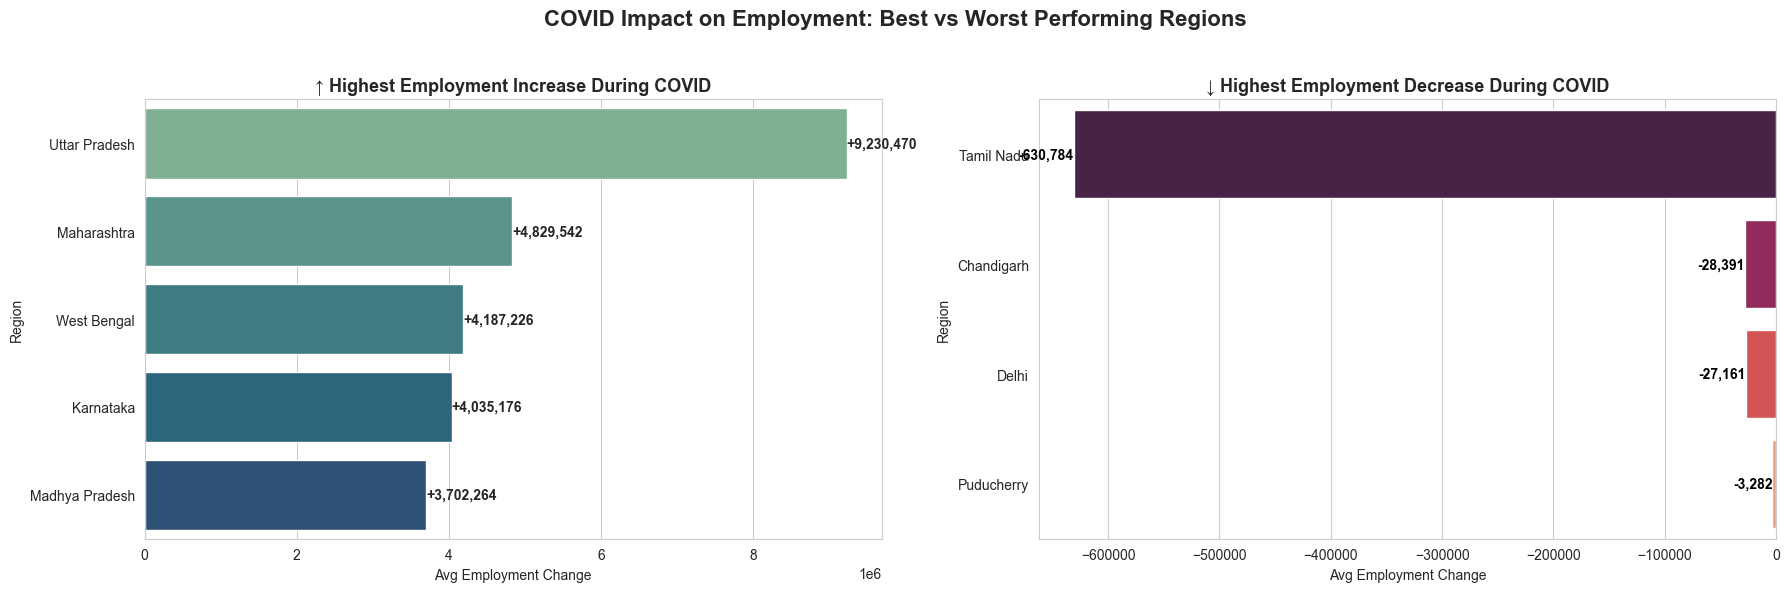

In [140]:
# Step 1: Compute employment change (COVID - Pre-COVID)
covid_employment_change = (
    combined_df[combined_df['COVID_Period'] == 'COVID Period'].groupby('Region')['Estimated Employed'].mean() -
    combined_df[combined_df['COVID_Period'] == 'Pre-COVID'].groupby('Region')['Estimated Employed'].mean()
)

# Step 2: Get Top 5 Increase and Decrease
top_increase = covid_employment_change.sort_values(ascending=False).head(5)
top_decrease = covid_employment_change.sort_values().head(4)

# Step 3: Set up subplots (NOT sharing y-axis so each has its own labels)
fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=False)
sns.set_style("whitegrid")

# ---- Plot 1: Top 5 Increases ----
sns.barplot(
    x=top_increase.values,
    y=top_increase.index,
    palette='crest',
    ax=axes[0]
)
axes[0].set_title('↑ Highest Employment Increase During COVID', fontsize=13, fontweight='bold')
axes[0].set_xlabel('Avg Employment Change')
axes[0].set_ylabel('Region')
for i, val in enumerate(top_increase.values):
    axes[0].text(val, i, f"+{val:,.0f}", va='center', ha='left', fontsize=10, fontweight='bold')

# ---- Plot 2: Top 5 Decreases ----
sns.barplot(
    x=top_decrease.values,
    y=top_decrease.index,
    palette='rocket',
    ax=axes[1]
)
axes[1].set_title('↓ Highest Employment Decrease During COVID', fontsize=13, fontweight='bold')
axes[1].set_xlabel('Avg Employment Change')
axes[1].set_ylabel('Region')  # now explicitly adding it for both

for i, val in enumerate(top_decrease.values):
    # Place annotation inside the bar for negative values, outside for positive (if any)
    text_color = 'black' if val < 0 else 'crimson'
    axes[1].text(val, i, f"{val:,.0f}", va='center', ha='left' if val >= 0 else 'right', 
                 fontsize=10, fontweight='bold', color=text_color)

# Final polish
plt.suptitle('COVID Impact on Employment: Best vs Worst Performing Regions', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [141]:
# Detailed statistical analysis
print("\n" + "="*60)
print("           DETAILED COVID IMPACT ANALYSIS")
print("="*60)

print("\n STATISTICAL SIGNIFICANCE TESTING:")
print("-" * 50)
from scipy import stats
pre_covid_unemployment = pre_covid['Estimated Unemployment Rate (%)']
covid_unemployment = covid_period['Estimated Unemployment Rate (%)']
t_stat, p_value = stats.ttest_ind(covid_unemployment, pre_covid_unemployment)
print(f"T-test Results:")
print(f"  T-statistic: {t_stat:.4f}")
print(f"  P-value: {p_value:.2e}")
print(f"  Statistically Significant: {'Yes' if p_value < 0.05 else 'No'}")

print("\n MONTH-BY-MONTH COVID IMPACT:")
print("-" * 50)
monthly_comparison = combined_df.groupby(['Year', 'Month'])['Estimated Unemployment Rate (%)'].mean().unstack(level=0)
if 2019 in monthly_comparison.columns and 2020 in monthly_comparison.columns:
    monthly_comparison['COVID_Impact'] = monthly_comparison[2020] - monthly_comparison[2019]
    print(monthly_comparison[['COVID_Impact']].round(2))
    
    worst_month = monthly_comparison['COVID_Impact'].idxmax()
    best_month = monthly_comparison['COVID_Impact'].idxmin()
    print(f"\nWorst affected month: {worst_month} (+{monthly_comparison.loc[worst_month, 'COVID_Impact']:.2f}pp)")
    print(f"Best performing month: {best_month} ({monthly_comparison.loc[best_month, 'COVID_Impact']:.2f}pp)")

print("\n URBAN VS RURAL DETAILED IMPACT:")
print("-" * 50)
for area in ['Urban', 'Rural']:
    area_data = combined_df[combined_df['Area'] == area]
    pre_covid_area = area_data[area_data['COVID_Period'] == 'Pre-COVID']['Estimated Unemployment Rate (%)'].mean()
    covid_area = area_data[area_data['COVID_Period'] == 'COVID Period']['Estimated Unemployment Rate (%)'].mean()
    
    print(f"{area}:")
    print(f"  Pre-COVID: {pre_covid_area:.2f}%")
    print(f"  COVID Period: {covid_area:.2f}%")
    print(f"  Impact: +{covid_area - pre_covid_area:.2f}pp ({((covid_area/pre_covid_area)-1)*100:.1f}% increase)")

print("\n TOP 10 MOST AFFECTED REGIONS:")
print("-" * 50)
regional_impact_detailed = combined_df.groupby(['Region', 'COVID_Period'])['Estimated Unemployment Rate (%)'].mean().unstack()
if 'Pre-COVID' in regional_impact_detailed.columns and 'COVID Period' in regional_impact_detailed.columns:
    regional_impact_detailed['Impact'] = regional_impact_detailed['COVID Period'] - regional_impact_detailed['Pre-COVID']
    top_affected_regions = regional_impact_detailed.nlargest(10, 'Impact')
    
    for i, (region, row) in enumerate(top_affected_regions.iterrows(), 1):
        print(f"{i:2d}. {region}: {row['Pre-COVID']:.2f}% → {row['COVID Period']:.2f}% (+{row['Impact']:.2f}pp)")

print("\n POLICY INSIGHTS AND RECOMMENDATIONS:")
print("="*60)

print("\n IMMEDIATE POLICY RESPONSES NEEDED:")
print("1. EMPLOYMENT STIMULUS:")
print("   - Rural areas need targeted employment programs")
print("   - Urban areas require service sector support")
print("   - Focus on worst-affected regions identified above")

print("\n2. SECTORAL INTERVENTIONS:")
if sector_impact:
    worst_sector = max(sector_impact, key=sector_impact.get)
    print(f"   - {worst_sector} sector most affected (+{sector_impact[worst_sector]:.1f}pp)")
    print("   - Sector-specific recovery packages needed")

print("\n3. GEOGRAPHIC TARGETING:")
if 'regional_impact_detailed' in locals():
    print(f"   - Priority regions: {', '.join(list(top_affected_regions.index[:5]))}")
    print("   - Regional development funds allocation")



           DETAILED COVID IMPACT ANALYSIS

 STATISTICAL SIGNIFICANCE TESTING:
--------------------------------------------------
T-test Results:
  T-statistic: 8.7938
  P-value: 6.18e-18
  Statistically Significant: Yes

 MONTH-BY-MONTH COVID IMPACT:
--------------------------------------------------
Year   COVID_Impact
Month              
1               NaN
2               NaN
3               NaN
4               NaN
5                15
6                 2
7                 1
8                 1
9                -0
10               -2
11              NaN
12              NaN

Worst affected month: 5 (+15.44pp)
Best performing month: 10 (-1.87pp)

 URBAN VS RURAL DETAILED IMPACT:
--------------------------------------------------
Urban:
  Pre-COVID: 10.69%
  COVID Period: 17.66%
  Impact: +6.98pp (65.3% increase)
Rural:
  Pre-COVID: 8.38%
  COVID Period: 14.16%
  Impact: +5.79pp (69.1% increase)

 TOP 10 MOST AFFECTED REGIONS:
--------------------------------------------------
 1. Pudu

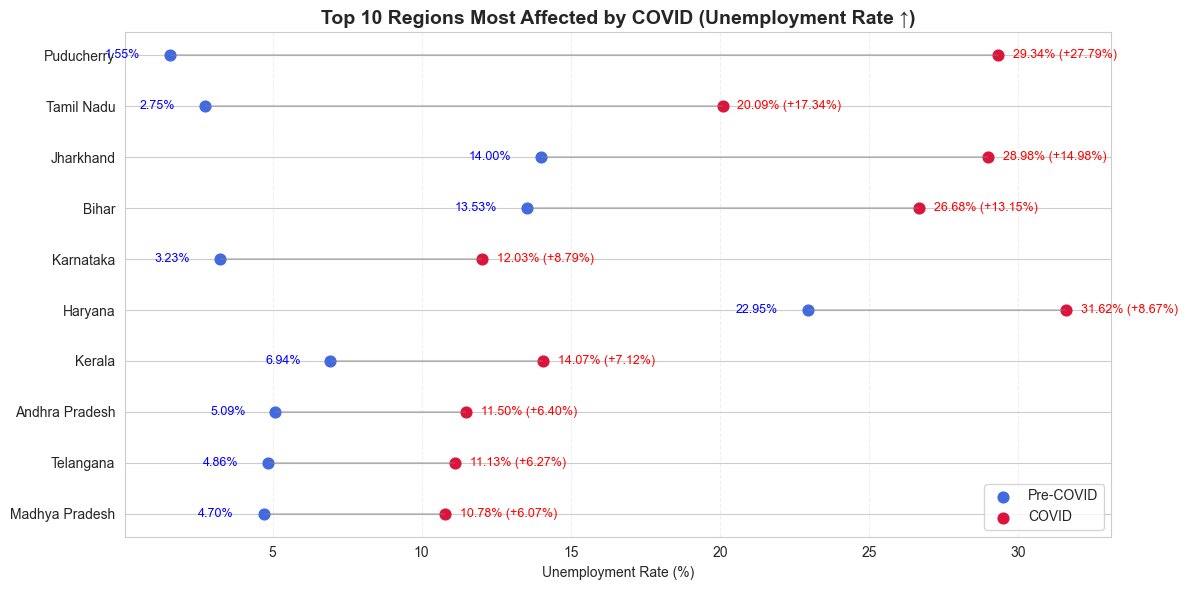

In [143]:
# Step 1: Compute pre and during COVID unemployment rates per region
unemp_pre = combined_df[combined_df['COVID_Period'] == 'Pre-COVID'].groupby('Region')['Estimated Unemployment Rate (%)'].mean()
unemp_during = combined_df[combined_df['COVID_Period'] == 'COVID Period'].groupby('Region')['Estimated Unemployment Rate (%)'].mean()

# Step 2: Merge into single DataFrame
unemp_df = pd.DataFrame({
    'Pre-COVID': unemp_pre,
    'COVID': unemp_during
}).dropna()

# Step 3: Calculate change and sort
unemp_df['Change'] = unemp_df['COVID'] - unemp_df['Pre-COVID']
top10_affected = unemp_df.sort_values('Change', ascending=False).head(10)

# Step 4: Plot
fig, ax = plt.subplots(figsize=(12, 6))
y_pos = range(len(top10_affected))

# Draw dumbbell lines
ax.hlines(y=y_pos, xmin=top10_affected['Pre-COVID'], xmax=top10_affected['COVID'], color='gray', alpha=0.4)

# Scatter points
ax.scatter(top10_affected['Pre-COVID'], y_pos, color='royalblue', label='Pre-COVID', s=60)
ax.scatter(top10_affected['COVID'], y_pos, color='crimson', label='COVID', s=60)

# Annotations
for i, (region, row) in enumerate(top10_affected.iterrows()):
    ax.text(row['Pre-COVID'] - 1, i, f"{row['Pre-COVID']:.2f}%", va='center', ha='right', fontsize=9, color='blue')
    ax.text(row['COVID'] + 0.5, i, f"{row['COVID']:.2f}% (+{row['Change']:.2f}%)", va='center', ha='left', fontsize=9, color='red')

# Y-axis labels
ax.set_yticks(y_pos)
ax.set_yticklabels(top10_affected.index)
ax.invert_yaxis()

# Labels, legend, polish
ax.set_title('Top 10 Regions Most Affected by COVID (Unemployment Rate ↑)', fontsize=14, fontweight='bold')
ax.set_xlabel('Unemployment Rate (%)')
ax.legend(loc='lower right')
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

In [144]:
print("\n4. LABOR MARKET FLEXIBILITY:")
print("   - Skill retraining programs for displaced workers")
print("   - Digital employment platforms promotion")
print("   - Gig economy integration policies")

print("\n LONG-TERM STRUCTURAL CHANGES:")
print("1. Economic diversification to reduce sector-specific shocks")
print("2. Strengthened social safety nets")
print("3. Enhanced data collection for real-time policy response")
print("4. Rural-urban migration pattern management")

print("\n RECOVERY INDICATORS TO MONITOR:")
print("1. Monthly unemployment rates returning to pre-COVID levels")
print("2. Labor participation rate recovery")
print("3. Regional convergence in employment levels")
print("4. Sector-wise employment normalization")

print("\n" + "="*60)
print("           ANALYSIS COMPLETE")
print("="*60)


4. LABOR MARKET FLEXIBILITY:
   - Skill retraining programs for displaced workers
   - Digital employment platforms promotion
   - Gig economy integration policies

 LONG-TERM STRUCTURAL CHANGES:
1. Economic diversification to reduce sector-specific shocks
2. Strengthened social safety nets
3. Enhanced data collection for real-time policy response
4. Rural-urban migration pattern management

 RECOVERY INDICATORS TO MONITOR:
1. Monthly unemployment rates returning to pre-COVID levels
2. Labor participation rate recovery
3. Regional convergence in employment levels
4. Sector-wise employment normalization

           ANALYSIS COMPLETE
